In [2]:
import re
import numpy as np    
import pandas as pd
import seaborn as sns
import matplotlib as mpl                         
import matplotlib.pyplot as plt
from numpy import asarray              
import os

In [3]:
os.chdir('/Users/elifriedmann/Downloads/ESG Categories')

In [4]:
edf = pd.read_excel("ESG_EnvironmentalBreakdown.xlsx", header=None)

In [5]:
eheader_row_1 = edf.iloc[0]
eheader_row_2 = edf.iloc[1]
eheaders=eheader_row_1.copy()
eheaders.dropna(inplace=True)
eheaders

0                                       Identifier (RIC)
1                                           Company Name
2                                Country of Headquarters
3                                     TRBC Industry Name
4          Environmental Pillar Score\nIn the last 10 FY
14             Environmental Products\nIn the last 10 FY
24     Environmental Assets Under Mgt\nIn the last 10 FY
34     Equator Principles or Env Project Financing\nI...
44     Renewable/Clean Energy Products\nIn the last 1...
54      Fossil Fuel Divestment Policy\nIn the last 10 FY
64                   Policy Emissions\nIn the last 10 FY
74                  Targets Emissions\nIn the last 10 FY
84     Total CO2 Equivalent Emissions To Revenues USD...
94     CO2 Equivalent Emissions Indirect, Scope 3 To ...
104    Climate Change Commercial Risks Opportunities\...
114    Total Waste To Revenues USD in million\nIn the...
124     Waste Recycled To Total Waste\nIn the last 10 FY
134    Total Hazardous Waste To

In [6]:
emerged_headers = []
prev_header = ''
for header1, header2 in zip(eheader_row_1, eheader_row_2):
    if pd.isnull(header1):
        emerged_headers.append(f"{prev_header} {header2}")
    elif pd.isnull(header2):
        emerged_headers.append(header1)
    else:
        emerged_headers.append(f"{header1} {header2}")
        prev_header = header1


In [7]:
edf.columns = emerged_headers

In [8]:
edf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Environmental Pillar Score\nIn the last 10 FY FY0,Environmental Pillar Score\nIn the last 10 FY FY-1,Environmental Pillar Score\nIn the last 10 FY FY-2,Environmental Pillar Score\nIn the last 10 FY FY-3,Environmental Pillar Score\nIn the last 10 FY FY-4,Environmental Pillar Score\nIn the last 10 FY FY-5,...,Env Supply Chain Partnership Termination\nIn the last 10 FY FY0,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-1,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-2,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-3,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-4,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-5,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-6,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-7,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-8,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-9
0,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Environmental Pillar Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,...,Env Supply Chain Partnership Termination\nIn t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,FY-6,FY-7,FY-8,FY-9
2,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,43.112682,41.190232,17.841983,17.018946,16.52245,23.24384,...,False,False,False,False,False,False,False,False,False,False
3,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,67.700815,90.05548,63.991854,55.369172,56.22998,64.975265,...,False,False,False,False,False,False,False,False,False,False
4,RF.N,Regions Financial Corp,United States of America,Banks,79.310586,76.573539,73.049803,48.389825,31.307148,53.196205,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,0,0,0,0,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
298,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,1.50803,1.8026,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,FSBC.OQ,Five Star Bancorp,United States of America,Banks,11.316174,11.197146,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,0,0,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
edf = edf.iloc[2:].reset_index(drop=True)

In [10]:
edf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Environmental Pillar Score\nIn the last 10 FY FY0,Environmental Pillar Score\nIn the last 10 FY FY-1,Environmental Pillar Score\nIn the last 10 FY FY-2,Environmental Pillar Score\nIn the last 10 FY FY-3,Environmental Pillar Score\nIn the last 10 FY FY-4,Environmental Pillar Score\nIn the last 10 FY FY-5,...,Env Supply Chain Partnership Termination\nIn the last 10 FY FY0,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-1,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-2,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-3,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-4,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-5,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-6,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-7,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-8,Env Supply Chain Partnership Termination\nIn the last 10 FY FY-9
0,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,43.112682,41.190232,17.841983,17.018946,16.52245,23.24384,...,False,False,False,False,False,False,False,False,False,False
1,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,67.700815,90.05548,63.991854,55.369172,56.22998,64.975265,...,False,False,False,False,False,False,False,False,False,False
2,RF.N,Regions Financial Corp,United States of America,Banks,79.310586,76.573539,73.049803,48.389825,31.307148,53.196205,...,False,False,False,False,False,False,False,False,False,False
3,FBNC.OQ,First Bancorp (North Carolina),United States of America,Banks,2.674334,2.614571,3.250591,2.622126,0,0,...,False,False,False,False,False,False,False,NaN,NaN,NaN
4,FCNCA.OQ,First Citizens BancShares Inc (Delaware),United States of America,Banks,1.569916,1.50803,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,0,0,0,0,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
296,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,1.50803,1.8026,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,FSBC.OQ,Five Star Bancorp,United States of America,Banks,11.316174,11.197146,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,0,0,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
sdf = pd.read_excel("ESG_SocialBreakdown.xlsx", header=None)

In [12]:
sheader_row_1 = sdf.iloc[0]
sheader_row_2 = sdf.iloc[1]
sheaders=sheader_row_1.copy()
sheaders.dropna(inplace=True)
sheaders

0                                       Identifier (RIC)
1                                           Company Name
2                                Country of Headquarters
3                                     TRBC Industry Name
4                 Social Pillar Score\nIn the last 10 FY
                             ...                        
804      Average Training Hours Score\nIn the last 10 FY
814    Training Costs Per Employee\n(USD)\nIn the las...
824    Training Costs Per Employee Score\nIn the last...
834                Internal Promotion\nIn the last 10 FY
844          Internal Promotion Score\nIn the last 10 FY
Name: 0, Length: 89, dtype: object

In [13]:
merged_headers = []
prev_header = ''
for header1, header2 in zip(sheader_row_1, sheader_row_2):
    if pd.isnull(header1):
        merged_headers.append(f"{prev_header} {header2}")
    elif pd.isnull(header2):
        merged_headers.append(header1)
    else:
        merged_headers.append(f"{header1} {header2}")
        prev_header = header1


In [14]:
sdf.columns = merged_headers

In [15]:
sdf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Social Pillar Score\nIn the last 10 FY FY0,Social Pillar Score\nIn the last 10 FY FY-1,Social Pillar Score\nIn the last 10 FY FY-2,Social Pillar Score\nIn the last 10 FY FY-3,Social Pillar Score\nIn the last 10 FY FY-4,Social Pillar Score\nIn the last 10 FY FY-5,...,Internal Promotion Score\nIn the last 10 FY FY0,Internal Promotion Score\nIn the last 10 FY FY-1,Internal Promotion Score\nIn the last 10 FY FY-2,Internal Promotion Score\nIn the last 10 FY FY-3,Internal Promotion Score\nIn the last 10 FY FY-4,Internal Promotion Score\nIn the last 10 FY FY-5,Internal Promotion Score\nIn the last 10 FY FY-6,Internal Promotion Score\nIn the last 10 FY FY-7,Internal Promotion Score\nIn the last 10 FY FY-8,Internal Promotion Score\nIn the last 10 FY FY-9
0,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Social Pillar Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,...,Internal Promotion Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,FY-6,FY-7,FY-8,FY-9
2,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,50.561428,51.695709,51.386964,49.335931,40.552702,26.176555,...,0,0,0,0,0,0,0,0,0,0
3,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,81.141784,80.277722,76.327333,63.341019,62.317497,59.440445,...,0,0,0,0,0,0,0,0,0,0
4,RF.N,Regions Financial Corp,United States of America,Banks,79.957977,76.27136,72.025669,48.070591,54.446716,51.507711,...,82.634731,83.715596,0,0,86.975398,86.944938,84.551887,82.424242,82.131661,81.290323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,17.75774,21.851305,24.049288,14.945413,NaN,NaN,...,81.472291,82.634731,83.715596,0,NaN,NaN,NaN,NaN,NaN,NaN
298,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,31.688083,43.531754,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,FSBC.OQ,Five Star Bancorp,United States of America,Banks,31.20527,31.787423,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,21.101891,22.590235,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sdf = sdf.iloc[2:].reset_index(drop=True)

In [17]:
sdf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Social Pillar Score\nIn the last 10 FY FY0,Social Pillar Score\nIn the last 10 FY FY-1,Social Pillar Score\nIn the last 10 FY FY-2,Social Pillar Score\nIn the last 10 FY FY-3,Social Pillar Score\nIn the last 10 FY FY-4,Social Pillar Score\nIn the last 10 FY FY-5,...,Internal Promotion Score\nIn the last 10 FY FY0,Internal Promotion Score\nIn the last 10 FY FY-1,Internal Promotion Score\nIn the last 10 FY FY-2,Internal Promotion Score\nIn the last 10 FY FY-3,Internal Promotion Score\nIn the last 10 FY FY-4,Internal Promotion Score\nIn the last 10 FY FY-5,Internal Promotion Score\nIn the last 10 FY FY-6,Internal Promotion Score\nIn the last 10 FY FY-7,Internal Promotion Score\nIn the last 10 FY FY-8,Internal Promotion Score\nIn the last 10 FY FY-9
0,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,50.561428,51.695709,51.386964,49.335931,40.552702,26.176555,...,0,0,0,0,0,0,0,0,0,0
1,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,81.141784,80.277722,76.327333,63.341019,62.317497,59.440445,...,0,0,0,0,0,0,0,0,0,0
2,RF.N,Regions Financial Corp,United States of America,Banks,79.957977,76.27136,72.025669,48.070591,54.446716,51.507711,...,82.634731,83.715596,0,0,86.975398,86.944938,84.551887,82.424242,82.131661,81.290323
3,FBNC.OQ,First Bancorp (North Carolina),United States of America,Banks,31.941683,34.668297,34.625642,36.533275,32.28235,40.09404,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,FCNCA.OQ,First Citizens BancShares Inc (Delaware),United States of America,Banks,28.355675,31.489402,24.193562,27.825963,17.433074,23.323114,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,17.75774,21.851305,24.049288,14.945413,NaN,NaN,...,81.472291,82.634731,83.715596,0,NaN,NaN,NaN,NaN,NaN,NaN
296,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,31.688083,43.531754,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,FSBC.OQ,Five Star Bancorp,United States of America,Banks,31.20527,31.787423,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,21.101891,22.590235,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
gdf = pd.read_excel("ESG_GovernanceBreakdown.xlsx", header=None)

In [19]:
gheader_row_1 = gdf.iloc[0]
gheader_row_2 = gdf.iloc[1]
gheaders=gheader_row_1.copy()
gheaders.dropna(inplace=True)
gheaders

0                                        Identifier (RIC)
1                                            Company Name
2                                 Country of Headquarters
3                                      TRBC Industry Name
4               Board Functions Policy\nIn the last 10 FY
                              ...                        
1064    CSR Sustainability Reporting Score\nIn the las...
1074       GRI Report Guidelines Score\nIn the last 10 FY
1084    CSR Sustainability Report Global Activities Sc...
1094    CSR Sustainability External Audit Score\nIn th...
1104             UNPRI Signatory Score\nIn the last 10 FY
Name: 0, Length: 115, dtype: object

In [20]:
merged_headers = []
prev_header = ''
for header1, header2 in zip(gheader_row_1, gheader_row_2):
    if pd.isnull(header1):
        merged_headers.append(f"{prev_header} {header2}")
    elif pd.isnull(header2):
        merged_headers.append(header1)
    else:
        merged_headers.append(f"{header1} {header2}")
        prev_header = header1


In [21]:
gdf.columns = merged_headers

In [22]:
gdf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Board Functions Policy\nIn the last 10 FY FY0,Board Functions Policy\nIn the last 10 FY FY-1,Board Functions Policy\nIn the last 10 FY FY-2,Board Functions Policy\nIn the last 10 FY FY-3,Board Functions Policy\nIn the last 10 FY FY-4,Board Functions Policy\nIn the last 10 FY FY-5,...,UNPRI Signatory Score\nIn the last 10 FY FY0,UNPRI Signatory Score\nIn the last 10 FY FY-1,UNPRI Signatory Score\nIn the last 10 FY FY-2,UNPRI Signatory Score\nIn the last 10 FY FY-3,UNPRI Signatory Score\nIn the last 10 FY FY-4,UNPRI Signatory Score\nIn the last 10 FY FY-5,UNPRI Signatory Score\nIn the last 10 FY FY-6,UNPRI Signatory Score\nIn the last 10 FY FY-7,UNPRI Signatory Score\nIn the last 10 FY FY-8,UNPRI Signatory Score\nIn the last 10 FY FY-9
0,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Board Functions Policy\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,...,UNPRI Signatory Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,...,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,FY-6,FY-7,FY-8,FY-9
2,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
3,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
4,RF.N,Regions Financial Corp,United States of America,Banks,True,False,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,True,True,True,True,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
298,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,FSBC.OQ,Five Star Bancorp,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
gdf = gdf.iloc[2:].reset_index(drop=True)

In [24]:
gdf

,Identifier (RIC),Company Name,Country of Headquarters,TRBC Industry Name,Board Functions Policy\nIn the last 10 FY FY0,Board Functions Policy\nIn the last 10 FY FY-1,Board Functions Policy\nIn the last 10 FY FY-2,Board Functions Policy\nIn the last 10 FY FY-3,Board Functions Policy\nIn the last 10 FY FY-4,Board Functions Policy\nIn the last 10 FY FY-5,...,UNPRI Signatory Score\nIn the last 10 FY FY0,UNPRI Signatory Score\nIn the last 10 FY FY-1,UNPRI Signatory Score\nIn the last 10 FY FY-2,UNPRI Signatory Score\nIn the last 10 FY FY-3,UNPRI Signatory Score\nIn the last 10 FY FY-4,UNPRI Signatory Score\nIn the last 10 FY FY-5,UNPRI Signatory Score\nIn the last 10 FY FY-6,UNPRI Signatory Score\nIn the last 10 FY FY-7,UNPRI Signatory Score\nIn the last 10 FY FY-8,UNPRI Signatory Score\nIn the last 10 FY FY-9
0,FNMA.PK,Federal National Mortgage Association,United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
1,FITB.OQ,Fifth Third Bancorp,United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
2,RF.N,Regions Financial Corp,United States of America,Banks,True,False,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
3,FBNC.OQ,First Bancorp (North Carolina),United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,FCNCA.OQ,First Citizens BancShares Inc (Delaware),United States of America,Banks,True,True,True,True,True,True,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,BSBK.OQ,Bogota Financial Corp,United States of America,Banks,True,True,True,True,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
296,EBC.OQ,Eastern Bankshares Inc,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,FSBC.OQ,Five Star Bancorp,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,AOMR.N,Angel Oak Mortgage REIT Inc,United States of America,Banks,True,True,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
cdf = pd.read_excel("ESG_CategoryBreakdown.xlsx", header=None)

In [26]:
cheader_row_1 = cdf.iloc[0]
cheader_row_2 = cdf.iloc[1]
cheaders=cheader_row_1.copy()
cheaders.dropna(inplace=True)
cheaders

0                                      Identifier (RIC)
1                                          Company Name
2                               Country of Headquarters
3                 Resource Use Score\nIn the last 10 FY
13                   Emissions Score\nIn the last 10 FY
23    Environmental Innovation Score\nIn the last 10 FY
33                   Workforce Score\nIn the last 10 FY
43                Human Rights Score\nIn the last 10 FY
53                   Community Score\nIn the last 10 FY
63      Product Responsibility Score\nIn the last 10 FY
73                  Management Score\nIn the last 10 FY
83                Shareholders Score\nIn the last 10 FY
93                CSR Strategy Score\nIn the last 10 FY
Name: 0, dtype: object

In [27]:
cmerged_headers = []
prev_header = ''
for header1, header2 in zip(cheader_row_1, cheader_row_2):
    if pd.isnull(header1):
        cmerged_headers.append(f"{prev_header} {header2}")
    elif pd.isnull(header2):
        cmerged_headers.append(header1)
    else:
        cmerged_headers.append(f"{header1} {header2}")
        prev_header = header1


In [28]:
cdf.columns = cmerged_headers

In [29]:

cdf


,Identifier (RIC),Company Name,Country of Headquarters,Resource Use Score\nIn the last 10 FY FY0,Resource Use Score\nIn the last 10 FY FY-1,Resource Use Score\nIn the last 10 FY FY-2,Resource Use Score\nIn the last 10 FY FY-3,Resource Use Score\nIn the last 10 FY FY-4,Resource Use Score\nIn the last 10 FY FY-5,Resource Use Score\nIn the last 10 FY FY-6,...,CSR Strategy Score\nIn the last 10 FY FY0,CSR Strategy Score\nIn the last 10 FY FY-1,CSR Strategy Score\nIn the last 10 FY FY-2,CSR Strategy Score\nIn the last 10 FY FY-3,CSR Strategy Score\nIn the last 10 FY FY-4,CSR Strategy Score\nIn the last 10 FY FY-5,CSR Strategy Score\nIn the last 10 FY FY-6,CSR Strategy Score\nIn the last 10 FY FY-7,CSR Strategy Score\nIn the last 10 FY FY-8,CSR Strategy Score\nIn the last 10 FY FY-9
0,Identifier (RIC),Company Name,Country of Headquarters,Resource Use Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,NaN,...,CSR Strategy Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,FY-6,...,FY0,FY-1,FY-2,FY-3,FY-4,FY-5,FY-6,FY-7,FY-8,FY-9
2,WFCL.PK,1867 Western Financial Corp,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BCOW.OQ,1895 Bancorp of Wisconsin Inc,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FISB.PK,1St Capital Bancorp,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,WOBK.PK,Woodsboro Bank,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,WSFGQ.PK,WSB Financial Group Inc,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,WSFS.OQ,WSFS Financial Corp,United States of America,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
764,WTBFB.PK,WTB Financial Corp,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cdf = cdf.iloc[2:].reset_index(drop=True)

In [31]:
cdf.drop('Country of Headquarters', axis=1, inplace=True)
cdf

,Identifier (RIC),Company Name,Resource Use Score\nIn the last 10 FY FY0,Resource Use Score\nIn the last 10 FY FY-1,Resource Use Score\nIn the last 10 FY FY-2,Resource Use Score\nIn the last 10 FY FY-3,Resource Use Score\nIn the last 10 FY FY-4,Resource Use Score\nIn the last 10 FY FY-5,Resource Use Score\nIn the last 10 FY FY-6,Resource Use Score\nIn the last 10 FY FY-7,...,CSR Strategy Score\nIn the last 10 FY FY0,CSR Strategy Score\nIn the last 10 FY FY-1,CSR Strategy Score\nIn the last 10 FY FY-2,CSR Strategy Score\nIn the last 10 FY FY-3,CSR Strategy Score\nIn the last 10 FY FY-4,CSR Strategy Score\nIn the last 10 FY FY-5,CSR Strategy Score\nIn the last 10 FY FY-6,CSR Strategy Score\nIn the last 10 FY FY-7,CSR Strategy Score\nIn the last 10 FY FY-8,CSR Strategy Score\nIn the last 10 FY FY-9
0,WFCL.PK,1867 Western Financial Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BCOW.OQ,1895 Bancorp of Wisconsin Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FISB.PK,1St Capital Bancorp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FCOB.PK,1st Colonial Bancorp Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FSGB.PK,1st FSB of SC Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,WOBK.PK,Woodsboro Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,WSFGQ.PK,WSB Financial Group Inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,WSFS.OQ,WSFS Financial Corp,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
762,WTBFB.PK,WTB Financial Corp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df = pd.read_excel("Anh_v2.MASTERFILE_DATA_10YRS2.xlsx", sheet_name='all by var', header=None)

In [33]:
header_row_1 = df.iloc[0]
header_row_2 = df.iloc[1]
header_row_2 = [i if i != 2022 else 'FY1' for i in header_row_2]
header_row_2 = [i if i != 2021 else 'FY0' for i in header_row_2]
header_row_2 = [i if i != 2020 else 'FY-1' for i in header_row_2]
header_row_2 = [i if i != 2019 else 'FY-2' for i in header_row_2]
header_row_2 = [i if i != 2018 else 'FY-3' for i in header_row_2]
header_row_2 = [i if i != 2017 else 'FY-4' for i in header_row_2]
header_row_2 = [i if i != 2016 else 'FY-5' for i in header_row_2]
header_row_2 = [i if i != 2015 else 'FY-6' for i in header_row_2]
header_row_2 = [i if i != 2014 else 'FY-7' for i in header_row_2]
header_row_2 = [i if i != 2013 else 'FY-8' for i in header_row_2]
header_row_2 = [i if i != 2012 else 'FY-9' for i in header_row_2]


In [34]:
merged_headers = []
prev_header = ''
for header1, header2 in zip(header_row_1, header_row_2):
    if pd.isnull(header1):
        merged_headers.append(f"{prev_header} {header2}")
    elif pd.isnull(header2):
        merged_headers.append(header1)
    else:
        merged_headers.append(f"{header1} {header2}")
        prev_header = header1

In [35]:
df.columns = merged_headers

In [36]:
df

,Identifier (RIC),Company Name,Stock Return FY1,Stock Return FY0,Stock Return FY-1,Stock Return FY-2,Stock Return FY-3,Stock Return FY-4,Stock Return FY-5,Stock Return FY-6,...,Governance Pillar Score\nIn the last 10 FY FY0,Governance Pillar Score\nIn the last 10 FY FY-1,Governance Pillar Score\nIn the last 10 FY FY-2,Governance Pillar Score\nIn the last 10 FY FY-3,Governance Pillar Score\nIn the last 10 FY FY-4,Governance Pillar Score\nIn the last 10 FY FY-5,Governance Pillar Score\nIn the last 10 FY FY-6,Governance Pillar Score\nIn the last 10 FY FY-7,Governance Pillar Score\nIn the last 10 FY FY-8,Governance Pillar Score\nIn the last 10 FY FY-9
0,Identifier (RIC),Company Name,Stock Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Governance Pillar Score\nIn the last 10 FY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2022,2021.0000,2020.0000,2019.0000,2018.0000,2017.0000,2016.0000,2015.0000,...,2021,2020.000000,2019.000000,2018.000000,2017.000000,2016.000000,2015.000000,2014.000000,2013.000000,2012.000000
2,JPM.N,JPMorgan Chase & Co,-15.3142,24.6164,-8.8450,42.7986,-8.7152,23.9309,30.6830,5.5129,...,80.783313,84.471454,81.754431,75.684938,84.789167,79.671493,79.534507,72.449289,67.190139,64.462437
3,BAC.N,Bank of America Corp,-25.5563,46.7833,-13.9410,42.9383,-16.5312,33.5746,31.3132,-5.9251,...,61.524124,66.110028,66.367110,55.068614,46.400140,53.995517,57.124655,33.773044,71.002812,63.764222
4,WFC.N,Wells Fargo & Co,-13.9433,58.9795,-43.9034,16.7535,-24.0481,10.0889,1.3797,-0.8391,...,65.274447,55.481924,58.861635,88.302750,89.495869,84.671493,87.124376,80.855976,86.760251,85.156315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,UNB.OQ,Union Bankshares Inc,-19.5109,16.0249,-29.0954,-24.0628,-9.8206,16.5017,62.8396,17.5196,...,70.744508,71.491930,69.652417,53.490011,54.872219,64.786412,NaN,NaN,NaN,NaN
298,PROV.OQ,Provident Financial Holdings Inc,-16.6969,5.2196,-28.2648,41.2903,-15.7608,-9.0010,7.0408,24.8513,...,50.179706,45.272185,41.400924,41.529968,NaN,NaN,NaN,NaN,NaN,NaN
299,FCAP.OQ,First Capital Inc,-38.5185,-33.1242,-17.0411,71.8456,15.6233,13.3251,24.2145,7.2309,...,31.266299,33.234734,25.608511,32.522608,27.670192,48.392411,NaN,NaN,NaN,NaN
300,AUBN.OQ,Auburn National Bancorporation Inc,-28.7926,-22.5234,-21.3396,67.4036,-18.6118,24.2414,5.7056,25.2961,...,48.694417,64.192559,67.659349,64.025237,76.363737,57.258578,NaN,NaN,NaN,NaN


In [37]:
df = df.iloc[2:].reset_index(drop=True)

In [38]:
df

,Identifier (RIC),Company Name,Stock Return FY1,Stock Return FY0,Stock Return FY-1,Stock Return FY-2,Stock Return FY-3,Stock Return FY-4,Stock Return FY-5,Stock Return FY-6,...,Governance Pillar Score\nIn the last 10 FY FY0,Governance Pillar Score\nIn the last 10 FY FY-1,Governance Pillar Score\nIn the last 10 FY FY-2,Governance Pillar Score\nIn the last 10 FY FY-3,Governance Pillar Score\nIn the last 10 FY FY-4,Governance Pillar Score\nIn the last 10 FY FY-5,Governance Pillar Score\nIn the last 10 FY FY-6,Governance Pillar Score\nIn the last 10 FY FY-7,Governance Pillar Score\nIn the last 10 FY FY-8,Governance Pillar Score\nIn the last 10 FY FY-9
0,JPM.N,JPMorgan Chase & Co,-15.3142,24.6164,-8.8450,42.7986,-8.7152,23.9309,30.6830,5.5129,...,80.783313,84.471454,81.754431,75.684938,84.789167,79.671493,79.534507,72.449289,67.190139,64.462437
1,BAC.N,Bank of America Corp,-25.5563,46.7833,-13.9410,42.9383,-16.5312,33.5746,31.3132,-5.9251,...,61.524124,66.110028,66.367110,55.068614,46.400140,53.995517,57.124655,33.773044,71.002812,63.764222
2,WFC.N,Wells Fargo & Co,-13.9433,58.9795,-43.9034,16.7535,-24.0481,10.0889,1.3797,-0.8391,...,65.274447,55.481924,58.861635,88.302750,89.495869,84.671493,87.124376,80.855976,86.760251,85.156315
3,USB.N,US Bancorp,-22.3607,20.5624,-21.4201,29.7374,-14.7070,4.3021,20.3890,-5.0723,...,50.040152,48.838945,48.551897,34.516993,35.508300,32.429221,29.769452,24.123674,45.561353,61.094154
4,PNC.N,PNC Financial Services Group Inc,-21.2348,34.5772,-6.6592,36.5409,-18.9757,23.3670,22.7154,4.4722,...,87.251413,84.821419,79.497247,93.984618,94.690143,89.038162,93.935014,90.995049,84.922421,89.118998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,-19.5109,16.0249,-29.0954,-24.0628,-9.8206,16.5017,62.8396,17.5196,...,70.744508,71.491930,69.652417,53.490011,54.872219,64.786412,NaN,NaN,NaN,NaN
296,PROV.OQ,Provident Financial Holdings Inc,-16.6969,5.2196,-28.2648,41.2903,-15.7608,-9.0010,7.0408,24.8513,...,50.179706,45.272185,41.400924,41.529968,NaN,NaN,NaN,NaN,NaN,NaN
297,FCAP.OQ,First Capital Inc,-38.5185,-33.1242,-17.0411,71.8456,15.6233,13.3251,24.2145,7.2309,...,31.266299,33.234734,25.608511,32.522608,27.670192,48.392411,NaN,NaN,NaN,NaN
298,AUBN.OQ,Auburn National Bancorporation Inc,-28.7926,-22.5234,-21.3396,67.4036,-18.6118,24.2414,5.7056,25.2961,...,48.694417,64.192559,67.659349,64.025237,76.363737,57.258578,NaN,NaN,NaN,NaN


In [39]:

df

,Identifier (RIC),Company Name,Stock Return FY1,Stock Return FY0,Stock Return FY-1,Stock Return FY-2,Stock Return FY-3,Stock Return FY-4,Stock Return FY-5,Stock Return FY-6,...,Governance Pillar Score\nIn the last 10 FY FY0,Governance Pillar Score\nIn the last 10 FY FY-1,Governance Pillar Score\nIn the last 10 FY FY-2,Governance Pillar Score\nIn the last 10 FY FY-3,Governance Pillar Score\nIn the last 10 FY FY-4,Governance Pillar Score\nIn the last 10 FY FY-5,Governance Pillar Score\nIn the last 10 FY FY-6,Governance Pillar Score\nIn the last 10 FY FY-7,Governance Pillar Score\nIn the last 10 FY FY-8,Governance Pillar Score\nIn the last 10 FY FY-9
0,JPM.N,JPMorgan Chase & Co,-15.3142,24.6164,-8.8450,42.7986,-8.7152,23.9309,30.6830,5.5129,...,80.783313,84.471454,81.754431,75.684938,84.789167,79.671493,79.534507,72.449289,67.190139,64.462437
1,BAC.N,Bank of America Corp,-25.5563,46.7833,-13.9410,42.9383,-16.5312,33.5746,31.3132,-5.9251,...,61.524124,66.110028,66.367110,55.068614,46.400140,53.995517,57.124655,33.773044,71.002812,63.764222
2,WFC.N,Wells Fargo & Co,-13.9433,58.9795,-43.9034,16.7535,-24.0481,10.0889,1.3797,-0.8391,...,65.274447,55.481924,58.861635,88.302750,89.495869,84.671493,87.124376,80.855976,86.760251,85.156315
3,USB.N,US Bancorp,-22.3607,20.5624,-21.4201,29.7374,-14.7070,4.3021,20.3890,-5.0723,...,50.040152,48.838945,48.551897,34.516993,35.508300,32.429221,29.769452,24.123674,45.561353,61.094154
4,PNC.N,PNC Financial Services Group Inc,-21.2348,34.5772,-6.6592,36.5409,-18.9757,23.3670,22.7154,4.4722,...,87.251413,84.821419,79.497247,93.984618,94.690143,89.038162,93.935014,90.995049,84.922421,89.118998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,-19.5109,16.0249,-29.0954,-24.0628,-9.8206,16.5017,62.8396,17.5196,...,70.744508,71.491930,69.652417,53.490011,54.872219,64.786412,NaN,NaN,NaN,NaN
296,PROV.OQ,Provident Financial Holdings Inc,-16.6969,5.2196,-28.2648,41.2903,-15.7608,-9.0010,7.0408,24.8513,...,50.179706,45.272185,41.400924,41.529968,NaN,NaN,NaN,NaN,NaN,NaN
297,FCAP.OQ,First Capital Inc,-38.5185,-33.1242,-17.0411,71.8456,15.6233,13.3251,24.2145,7.2309,...,31.266299,33.234734,25.608511,32.522608,27.670192,48.392411,NaN,NaN,NaN,NaN
298,AUBN.OQ,Auburn National Bancorporation Inc,-28.7926,-22.5234,-21.3396,67.4036,-18.6118,24.2414,5.7056,25.2961,...,48.694417,64.192559,67.659349,64.025237,76.363737,57.258578,NaN,NaN,NaN,NaN


In [40]:
alldfs=[edf,sdf,gdf,cdf,df]
for dfs in alldfs:
    cols=[]
    for col in dfs:
        if str(col).__contains__('\nIn the last 10 Y'):
            col=str(col).replace('\nIn the last 10 Y','')
            cols.append(col)
        elif str(col).__contains__('\nIn the last 10 FY'):
            col=str(col).replace('\nIn the last 10 FY','')
            cols.append(col)
        else:
            cols.append(col)
    dfs.columns=cols
ha=[]
for col in df:
    if '\n' in col:
        col=str(col).replace('\n',' ')
        ha.append(col)
    else:
        ha.append(col)
df.columns=ha

In [41]:
df

,Identifier (RIC),Company Name,Stock Return FY1,Stock Return FY0,Stock Return FY-1,Stock Return FY-2,Stock Return FY-3,Stock Return FY-4,Stock Return FY-5,Stock Return FY-6,...,Governance Pillar Score FY0,Governance Pillar Score FY-1,Governance Pillar Score FY-2,Governance Pillar Score FY-3,Governance Pillar Score FY-4,Governance Pillar Score FY-5,Governance Pillar Score FY-6,Governance Pillar Score FY-7,Governance Pillar Score FY-8,Governance Pillar Score FY-9
0,JPM.N,JPMorgan Chase & Co,-15.3142,24.6164,-8.8450,42.7986,-8.7152,23.9309,30.6830,5.5129,...,80.783313,84.471454,81.754431,75.684938,84.789167,79.671493,79.534507,72.449289,67.190139,64.462437
1,BAC.N,Bank of America Corp,-25.5563,46.7833,-13.9410,42.9383,-16.5312,33.5746,31.3132,-5.9251,...,61.524124,66.110028,66.367110,55.068614,46.400140,53.995517,57.124655,33.773044,71.002812,63.764222
2,WFC.N,Wells Fargo & Co,-13.9433,58.9795,-43.9034,16.7535,-24.0481,10.0889,1.3797,-0.8391,...,65.274447,55.481924,58.861635,88.302750,89.495869,84.671493,87.124376,80.855976,86.760251,85.156315
3,USB.N,US Bancorp,-22.3607,20.5624,-21.4201,29.7374,-14.7070,4.3021,20.3890,-5.0723,...,50.040152,48.838945,48.551897,34.516993,35.508300,32.429221,29.769452,24.123674,45.561353,61.094154
4,PNC.N,PNC Financial Services Group Inc,-21.2348,34.5772,-6.6592,36.5409,-18.9757,23.3670,22.7154,4.4722,...,87.251413,84.821419,79.497247,93.984618,94.690143,89.038162,93.935014,90.995049,84.922421,89.118998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,-19.5109,16.0249,-29.0954,-24.0628,-9.8206,16.5017,62.8396,17.5196,...,70.744508,71.491930,69.652417,53.490011,54.872219,64.786412,NaN,NaN,NaN,NaN
296,PROV.OQ,Provident Financial Holdings Inc,-16.6969,5.2196,-28.2648,41.2903,-15.7608,-9.0010,7.0408,24.8513,...,50.179706,45.272185,41.400924,41.529968,NaN,NaN,NaN,NaN,NaN,NaN
297,FCAP.OQ,First Capital Inc,-38.5185,-33.1242,-17.0411,71.8456,15.6233,13.3251,24.2145,7.2309,...,31.266299,33.234734,25.608511,32.522608,27.670192,48.392411,NaN,NaN,NaN,NaN
298,AUBN.OQ,Auburn National Bancorporation Inc,-28.7926,-22.5234,-21.3396,67.4036,-18.6118,24.2414,5.7056,25.2961,...,48.694417,64.192559,67.659349,64.025237,76.363737,57.258578,NaN,NaN,NaN,NaN


In [42]:
alldfs1=[edf,sdf,gdf]
for dfs in alldfs1:
    dfs.drop(['Country of Headquarters','TRBC Industry Name'], axis=1, inplace=True)

In [43]:
edf

,Identifier (RIC),Company Name,Environmental Pillar Score FY0,Environmental Pillar Score FY-1,Environmental Pillar Score FY-2,Environmental Pillar Score FY-3,Environmental Pillar Score FY-4,Environmental Pillar Score FY-5,Environmental Pillar Score FY-6,Environmental Pillar Score FY-7,...,Env Supply Chain Partnership Termination FY0,Env Supply Chain Partnership Termination FY-1,Env Supply Chain Partnership Termination FY-2,Env Supply Chain Partnership Termination FY-3,Env Supply Chain Partnership Termination FY-4,Env Supply Chain Partnership Termination FY-5,Env Supply Chain Partnership Termination FY-6,Env Supply Chain Partnership Termination FY-7,Env Supply Chain Partnership Termination FY-8,Env Supply Chain Partnership Termination FY-9
0,FNMA.PK,Federal National Mortgage Association,43.112682,41.190232,17.841983,17.018946,16.52245,23.24384,20.859086,17.20154,...,False,False,False,False,False,False,False,False,False,False
1,FITB.OQ,Fifth Third Bancorp,67.700815,90.05548,63.991854,55.369172,56.22998,64.975265,64.017313,62.793344,...,False,False,False,False,False,False,False,False,False,False
2,RF.N,Regions Financial Corp,79.310586,76.573539,73.049803,48.389825,31.307148,53.196205,43.692336,39.839448,...,False,False,False,False,False,False,False,False,False,False
3,FBNC.OQ,First Bancorp (North Carolina),2.674334,2.614571,3.250591,2.622126,0,0,21.152704,NaN,...,False,False,False,False,False,False,False,NaN,NaN,NaN
4,FCNCA.OQ,First Citizens BancShares Inc (Delaware),1.569916,1.50803,0,0,0,0,21.152704,18.282112,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,BSBK.OQ,Bogota Financial Corp,0,0,0,0,NaN,NaN,NaN,NaN,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
296,EBC.OQ,Eastern Bankshares Inc,1.50803,1.8026,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,FSBC.OQ,Five Star Bancorp,11.316174,11.197146,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,AOMR.N,Angel Oak Mortgage REIT Inc,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for col in df:
    if str(col).__contains__('Environmental') or str(col).__contains__('Social') or str(col).__contains__('Governance'):
        df.drop(col, axis=1, inplace=True)
df.columns
    

Index(['Identifier (RIC)', 'Company Name', 'Stock Return FY1',
       'Stock Return FY0', 'Stock Return FY-1', 'Stock Return FY-2',
       'Stock Return FY-3', 'Stock Return FY-4', 'Stock Return FY-5',
       'Stock Return FY-6', 'Stock Return FY-7', 'Stock Return FY-8',
       'Stock Return FY-9', 'Volatility FY1', 'Volatility FY0',
       'Volatility FY-1', 'Volatility FY-2', 'Volatility FY-3',
       'Volatility FY-4', 'Volatility FY-5', 'Volatility FY-6',
       'Volatility FY-7', 'Volatility FY-8', 'Volatility FY-9',
       'Return On Assets - Mean FY0', 'Return On Assets - Mean FY-1',
       'Return On Assets - Mean FY-2', 'Return On Assets - Mean FY-3',
       'Return On Assets - Mean FY-4', 'Return On Assets - Mean FY-5',
       'Return On Assets - Mean FY-6', 'Return On Assets - Mean FY-7',
       'Return On Assets - Mean FY-8', 'Return On Assets - Mean FY-9',
       'Beta FY0', 'Beta FY-1', 'Beta FY-2', 'Beta FY-3', 'Beta FY-4',
       'Beta FY-5', 'Beta FY-6', 'Beta FY-7', '

In [45]:
mergecols=['Identifier (RIC)', 'Company Name']
esdf=pd.merge(edf,sdf, on=mergecols, how='outer')
a=[]
for col in df:
    if not str(col).__contains__('ESG') and col!='Company Name' and col!='Identifier (RIC)' and not str(col).__contains__('Market Cap'):
        a.append(col)
df1=df.drop(a, axis=1)
a.append('Company Name')
a.append('Identifier (RIC)')
a.append('Company Market Capitalization (Millions, USD) FY0')
b=list(set(df.columns)-set(a))
df2=df.drop(b, axis=1)
gddf=pd.merge(df1, gdf, on=mergecols, how='outer')
master=pd.merge(gddf,esdf, on=mergecols, how='outer')
master=pd.merge(master, cdf, on=mergecols, how='left')
master

,Identifier (RIC),Company Name,ESG Score FY0,ESG Score FY-1,ESG Score FY-2,ESG Score FY-3,ESG Score FY-4,ESG Score FY-5,ESG Score FY-6,ESG Score FY-7,...,CSR Strategy Score FY0,CSR Strategy Score FY-1,CSR Strategy Score FY-2,CSR Strategy Score FY-3,CSR Strategy Score FY-4,CSR Strategy Score FY-5,CSR Strategy Score FY-6,CSR Strategy Score FY-7,CSR Strategy Score FY-8,CSR Strategy Score FY-9
0,JPM.N,JPMorgan Chase & Co,82.056081,84.703966,82.925241,78.422034,84.552133,81.521252,77.841928,71.365904,...,72.398844,71.227621,70.121951,68.851508,69.686649,69.667171,69.869707,70.109689,69.765343,69.565217
1,BAC.N,Bank of America Corp,78.580336,81.296250,81.892310,75.470521,74.472317,69.918468,68.432717,58.680998,...,97.109827,96.994885,95.426829,95.243619,94.959128,95.612708,84.85342,85.923218,84.747292,85.144928
2,WFC.N,Wells Fargo & Co,74.924592,72.248263,74.806049,84.137372,83.559104,81.190240,79.944974,65.511371,...,87.066474,85.613811,84.45122,83.990719,84.196185,69.667171,69.869707,70.109689,69.765343,69.565217
3,USB.N,US Bancorp,66.808498,56.304939,55.757290,51.512847,52.576000,51.043071,42.608835,39.975231,...,29.359345,6.329923,5.487805,7.018561,7.425068,7.564297,8.794788,9.04936,10.108303,53.894928
4,PNC.N,PNC Financial Services Group Inc,75.305527,75.361893,72.908693,81.587784,81.371553,80.322166,72.656779,71.761083,...,87.066474,85.613811,52.656794,83.990719,84.196185,84.94705,76.954397,59.04936,59.205776,41.938406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,41.3046,40.383879,35.832326,32.440097,27.776739,29.941343,NaN,NaN,...,7.262443,6.647399,0,0,0,0,NaN,NaN,NaN,NaN
296,PROV.OQ,Provident Financial Holdings Inc,34.756117,32.613736,23.048376,23.075205,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
297,FCAP.OQ,First Capital Inc,23.049314,25.990091,20.555768,26.407616,24.707539,31.894887,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
298,AUBN.OQ,Auburn National Bancorporation Inc,39.249847,45.921237,42.184676,38.250467,37.850337,31.060048,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [46]:
x0,x1,x2,x3,x4,x5,x6,x7,x8,x9=[],[],[],[],[],[],[],[],[],[]
for m in master:
    if not (str(m).__contains__('Y0') or m=='Company Name' or m=='Identifier (RIC)'):
        x0.append(m)
    if not (str(m).__contains__('Y-1') or m=='Company Name' or m=='Identifier (RIC)'):
        x1.append(m)
    if not (str(m).__contains__('Y-2') or m=='Company Name' or m=='Identifier (RIC)'):
        x2.append(m)
    if not (str(m).__contains__('Y-3') or m=='Company Name' or m=='Identifier (RIC)'):
        x3.append(m)
    if not (str(m).__contains__('Y-4') or m=='Company Name' or m=='Identifier (RIC)'):
        x4.append(m)
    if not (str(m).__contains__('Y-5') or m=='Company Name' or m=='Identifier (RIC)'):
        x5.append(m)
    if not (str(m).__contains__('Y-6') or m=='Company Name' or m=='Identifier (RIC)'):
        x6.append(m)
    if not (str(m).__contains__('Y-7') or m=='Company Name' or m=='Identifier (RIC)'):
        x7.append(m)
    if not (str(m).__contains__('Y-8') or m=='Company Name' or m=='Identifier (RIC)'):
        x8.append(m)
    if not (str(m).__contains__('Y-9') or m=='Company Name' or m=='Identifier (RIC)'):
        x9.append(m)
y0=master.drop(x0,axis=1)
y1=master.drop(x1,axis=1)
y2=master.drop(x2,axis=1)
y3=master.drop(x3,axis=1)
y4=master.drop(x4,axis=1)
y5=master.drop(x5,axis=1)
y6=master.drop(x6,axis=1)
y7=master.drop(x7,axis=1)
y8=master.drop(x8,axis=1)
y9=master.drop(x9,axis=1)
y1


,Identifier (RIC),Company Name,ESG Score FY-1,"Company Market Capitalization (Millions, USD) FY-1",Board Functions Policy FY-1,Board Structure Policy FY-1,Compensation Improvement Tools FY-1,Internal Audit Department Reporting FY-1,Succession Plan FY-1,Audit Committee Independence FY-1,...,Resource Use Score FY-1,Emissions Score FY-1,Environmental Innovation Score FY-1,Workforce Score FY-1,Human Rights Score FY-1,Community Score FY-1,Product Responsibility Score FY-1,Management Score FY-1,Shareholders Score FY-1,CSR Strategy Score FY-1
0,JPM.N,JPMorgan Chase & Co,84.703966,467966.380759,True,True,True,True,True,100,...,98.390152,72.719298,80.053908,82.760596,95.698925,90.664376,74.116931,98.801271,45.508377,71.227621
1,BAC.N,Bank of America Corp,81.296250,364109.898584,False,True,True,True,True,100,...,96.306818,85.526316,80.053908,97.651775,87.5,98.339061,74.116931,56.311381,77.830734,96.994885
2,WFC.N,Wells Fargo & Co,72.248263,191307.418565,False,True,True,True,True,100,...,77.367424,88.859649,80.053908,94.444444,48.252688,94.215349,74.116931,46.606008,64.543616,85.613811
3,USB.N,US Bancorp,56.304939,83288.745629,False,True,True,True,True,100,...,68.465909,75.526316,50.673854,62.485682,29.032258,75.773196,74.116931,55.90699,53.076256,6.329923
4,PNC.N,PNC Financial Services Group Inc,75.361893,84747.934620,True,True,True,True,True,100,...,90.056818,57.631579,50.673854,83.791523,19.086022,99.713631,74.116931,82.79896,90.684575,85.613811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,40.383879,133.792203,True,True,True,True,True,100,...,22.911392,25.554259,0,34.74359,0,33.632479,30.342651,97.377579,28.299776,6.647399
296,PROV.OQ,Provident Financial Holdings Inc,32.613736,122.155758,True,True,True,True,False,100,...,0,0,0,36.880342,0,54.145299,30.342651,62.826249,16.691524,0
297,FCAP.OQ,First Capital Inc,25.990091,136.641816,False,True,True,True,True,100,...,0,0,0,20.641026,0,60.854701,30.342651,45.848869,13.261248,0
298,AUBN.OQ,Auburn National Bancorporation Inc,45.921237,113.943224,True,True,True,True,True,100,...,0,0,0,45.512821,0,60.854701,76.059513,66.753666,98.284862,0


In [47]:
z0,z1,z2,z3,z4,z5,z6,z7,z8,z9=[],[],[],[],[],[],[],[],[],[]
for m in df2:
    if not (str(m).__contains__('Y1') or m=='Company Name' or m=='Identifier (RIC)'):
        z0.append(m)
    if not (str(m).__contains__('Y0') or m=='Company Name' or m=='Identifier (RIC)'):
        z1.append(m)
    if not (str(m).__contains__('Y-1') or m=='Company Name' or m=='Identifier (RIC)'):
        z2.append(m)
    if not (str(m).__contains__('Y-2') or m=='Company Name' or m=='Identifier (RIC)'):
        z3.append(m)
    if not (str(m).__contains__('Y-3') or m=='Company Name' or m=='Identifier (RIC)'):
        z4.append(m)
    if not (str(m).__contains__('Y-4') or m=='Company Name' or m=='Identifier (RIC)'):
        z5.append(m)
    if not (str(m).__contains__('Y-5') or m=='Company Name' or m=='Identifier (RIC)'):
        z6.append(m)
    if not (str(m).__contains__('Y-6') or m=='Company Name' or m=='Identifier (RIC)'):
        z7.append(m)
    if not (str(m).__contains__('Y-7') or m=='Company Name' or m=='Identifier (RIC)'):
        z8.append(m)
    if not (str(m).__contains__('Y-8') or m=='Company Name' or m=='Identifier (RIC)'):
        z9.append(m)
t0=df2.drop(z0,axis=1)
t1=df2.drop(z1,axis=1)
t2=df2.drop(z2,axis=1)
t3=df2.drop(z3,axis=1)
t4=df2.drop(z4,axis=1)
t5=df2.drop(z5,axis=1)
t6=df2.drop(z6,axis=1)
t7=df2.drop(z7,axis=1)
t8=df2.drop(z8,axis=1)
t9=df2.drop(z9,axis=1)
t0

,Identifier (RIC),Company Name,Stock Return FY1,Volatility FY1
0,JPM.N,JPMorgan Chase & Co,-15.3142,29.43798
1,BAC.N,Bank of America Corp,-25.5563,31.909446
2,WFC.N,Wells Fargo & Co,-13.9433,33.498623
3,USB.N,US Bancorp,-22.3607,28.625238
4,PNC.N,PNC Financial Services Group Inc,-21.2348,30.123806
...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,-19.5109,31.148416
296,PROV.OQ,Provident Financial Holdings Inc,-16.6969,18.416882
297,FCAP.OQ,First Capital Inc,-38.5185,26.89534
298,AUBN.OQ,Auburn National Bancorporation Inc,-28.7926,27.998081


In [48]:
dep=[t0, t1, t2, t3, t4, t5, t6, t7, t8, t9]
for d in dep:
    d.reset_index(drop=True, inplace=True)
    for i in reversed(d.iloc[:, 1].index):
        if pd.isna(d.iloc[i, 1]):
            d.drop(i, axis=0, inplace=True)
    d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Identifier (RIC)  300 non-null    object
 1   Company Name      300 non-null    object
 2   Stock Return FY1  299 non-null    object
 3   Volatility FY1    299 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Identifier (RIC)                                             300 non-null    object 
 1   Company Name                                                 300 non-null    object 
 2   Stock Return FY0                                             296 non-null    float64
 3   Volatility FY0       

In [49]:
y1['Environmental Innovation Score FY-1']

0      80.053908
1      80.053908
2      80.053908
3      50.673854
4      50.673854
         ...    
295            0
296            0
297            0
298            0
299            0
Name: Environmental Innovation Score FY-1, Length: 300, dtype: object

In [50]:
indep = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9]
for d in indep:
    d.reset_index(drop=True, inplace=True)
    for i in reversed(d.iloc[:, 2].index):
        if pd.isna(d.iloc[i, 2]):
            d.drop(i, axis=0, inplace=True)

In [51]:
for d in indep:
    row_threshold = len(d.columns) * 0.3
    d = d.dropna(thresh=row_threshold,inplace=True)

In [52]:
for d in indep:
    col_threshold = len(d) * 0.7
    d = d.dropna(axis=1, thresh=col_threshold,inplace=True)

In [53]:
year0=pd.merge(y0,t0, on=mergecols, how='left')
year1=pd.merge(y1,t1, on=mergecols, how='left')
year2=pd.merge(y2,t2, on=mergecols, how='left')
year3=pd.merge(y3,t3, on=mergecols, how='left')
year4=pd.merge(y4,t4, on=mergecols, how='left')
year5=pd.merge(y5,t5, on=mergecols, how='left')
year6=pd.merge(y6,t6, on=mergecols, how='left')
year7=pd.merge(y7,t7, on=mergecols, how='left')
year8=pd.merge(y8,t8, on=mergecols, how='left')
year9=pd.merge(y9,t9, on=mergecols, how='left')

In [54]:
dfs1=[year0,year1,year2,year3,year4,year5,year6,year7,year8,year9]
for d in dfs1:

# Assuming you have a DataFrame named 'df'
    duplicated_columns = d.columns[d.columns.duplicated()]

    if len(duplicated_columns) > 0:
        print("Duplicate columns found:")
        print(duplicated_columns)

        # Drop one of the duplicated columns
        d = d.drop(columns=duplicated_columns[0], inplace=True)
        print("Dropped column:", duplicated_columns[0])

        print("Updated DataFrame:")
        print(d) 
    else:
        print("No duplicate columns found.")


No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.


In [55]:
dfs1=[year0,year1,year2,year3,year4,year5,year6,year7,year8,year9]
for df3 in dfs1:
    for d in range(len(df3.columns)):
        if pd.isna(df3.iloc[0, d]):
            print(df3.columns[d])

Beta FY-8


In [56]:
for df3 in dfs1:
    for d in df3.columns:
        if type(df3.loc[0,d])==bool:
            df3[d].fillna(False)
            df3[d]=df3[d].astype('bool')
        elif type(df3.loc[0,d])==float:
            df3[d]=df3[d].astype('float')
    df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 193 entries, Identifier (RIC) to Volatility FY1
dtypes: bool(76), float64(88), object(29)
memory usage: 296.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Columns: 198 entries, Identifier (RIC) to Price To Book Value Per Share (Daily Time Series Ratio) FY0
dtypes: bool(75), float64(98), object(25)
memory usage: 307.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Columns: 197 entries, Identifier (RIC) to Price To Book Value Per Share (Daily Time Series Ratio) FY-1
dtypes: bool(75), float64(98), object(24)
memory usage: 300.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 197 entries, Identifier (RIC) to Price To Book Value Per Share (Daily Time Series Ratio) FY-2
dtypes: bool(75), float64(96), object(26)
memory usage: 293.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Columns: 19

In [57]:
for df3 in dfs1:
    x=0
    for d in df3.columns:
        if type(df3.loc[0,d])==pd.Series:
            df3[d]=df3[d].astype('float')
            x=x+1
    print(x)

0
0
0
0
0
0
0
0
0
0


In [58]:
for df3 in dfs1:
    x=0
    for d in range(len(df3.columns)):
        if df3.iloc[:,d].dtype==bool:
            x=x+1
            print(df3.columns[d], df3.iloc[:,d].isna().sum())
    print(x)

Board Functions Policy FY0 0
Board Structure Policy FY0 0
Compensation Improvement Tools FY0 0
Internal Audit Department Reporting FY0 0
Succession Plan FY0 0
Audit Committee Mgt Independence FY0 0
Compensation Committee Mgt Independence FY0 0
Board Attendance FY0 0
Board Background and Skills FY0 0
CEO Chairman Duality FY0 0
Board Individual Re-election FY0 0
Executive Compensation Policy FY0 0
Executive Individual Compensation FY0 0
CEO Compensation Link to TSR FY0 0
Executive Compensation LT Objectives FY0 0
Sustainability Compensation Incentives FY0 0
Shareholders Approval Stock Compensation Plan FY0 0
Shareholder Rights Policy FY0 0
Equal Shareholder Rights FY0 0
Director Election Majority Requirement FY0 0
Shareholders Vote on Executive Pay FY0 0
Public Availability Corporate Statutes FY0 0
Veto Power or Golden share FY0 0
State Owned Enterprise SOE FY0 0
CSR Sustainability Committee FY0 0
Integrated Strategy in MD&A FY0 0
Global Compact Signatory FY0 0
Stakeholder Engagement FY0

In [59]:
x=0
k=pd.DataFrame()
k['Size']=''
for d in dfs1:
    d['Size']=k['Size']

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/1196252050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['Size']=k['Size']
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/1196252050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d['Size']=k['Size']
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/1196252050.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [60]:
x=0
for d in dfs1:
    for i in reversed(d.index):
        if d.iloc[i, 3] < 1000:
            d.loc[i, 'Size'] = 'Small'
        elif 1000 <= d.iloc[i, 3] <= 50000:
            d.loc[i, 'Size'] = 'Medium'
        elif 50000 < d.iloc[i, 3] <= 100000:
            d.loc[i, 'Size'] = 'Medium Large'
        else:
            d.loc[i, 'Size'] = 'Large'
year0

,Identifier (RIC),Company Name,ESG Score FY0,"Company Market Capitalization (Millions, USD) FY0",Board Functions Policy FY0,Board Structure Policy FY0,Compensation Improvement Tools FY0,Internal Audit Department Reporting FY0,Succession Plan FY0,Audit Committee Independence FY0,...,Workforce Score FY0,Human Rights Score FY0,Community Score FY0,Product Responsibility Score FY0,Management Score FY0,Shareholders Score FY0,CSR Strategy Score FY0,Stock Return FY1,Volatility FY1,Size
0,JPM.N,JPMorgan Chase & Co,82.056081,393342.775481,True,True,True,True,True,100,...,78.162393,94.897959,81.880342,76.059513,98.620433,26.882923,72.398844,-15.3142,29.437980,Large
1,BAC.N,Bank of America Corp,78.580336,265702.955756,False,True,True,True,True,100,...,97.564103,88.350340,81.880342,76.059513,46.470296,87.956749,97.109827,-25.5563,31.909446,Large
2,WFC.N,Wells Fargo & Co,74.924592,157335.169178,False,True,True,True,True,100,...,94.145299,44.302721,87.735043,76.059513,59.172260,70.929654,87.066474,-13.9433,33.498623,Large
3,USB.N,US Bancorp,66.808498,66733.851701,False,True,True,True,True,100,...,79.615385,52.636054,77.393162,76.059513,52.386279,55.940840,29.359345,-22.3607,28.625238,Medium Large
4,PNC.N,PNC Financial Services Group Inc,75.305527,63700.208072,True,True,True,True,True,100,...,87.649573,22.108844,99.786325,76.059513,88.056177,84.650758,87.066474,-21.2348,30.123806,Medium Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,UNB.OQ,Union Bankshares Inc,41.304600,108.003541,True,True,True,True,True,100,...,28.057851,0.000000,19.958678,75.519031,95.005008,31.935403,7.262443,-19.5109,31.148416,Small
296,PROV.OQ,Provident Financial Holdings Inc,34.756117,99.180298,True,True,True,True,False,100,...,38.636364,0.000000,52.520661,29.584775,70.017526,17.463696,0.000000,-16.6969,18.416882,Small
297,FCAP.OQ,First Capital Inc,23.049314,83.946914,False,True,True,True,True,100,...,10.537190,0.000000,59.380165,29.584775,42.726590,13.257386,0.000000,-38.5185,26.895340,Small
298,AUBN.OQ,Auburn National Bancorporation Inc,39.249847,80.601660,True,True,True,True,True,100,...,40.702479,0.000000,59.380165,75.519031,48.460190,82.098147,0.000000,-28.7926,27.998081,Small


In [61]:
t6.isna().sum()

Identifier (RIC)                                                 0
Company Name                                                     0
Stock Return FY-5                                               41
Volatility FY-5                                                 35
Return On Assets - Mean FY-5                                    77
Beta FY-5                                                       55
Price To Book Value Per Share (Daily Time Series Ratio) FY-5    32
dtype: int64

In [62]:
for d in dfs1:
    subset1 = d[d['Size'] == 'Small'].copy()
    subset2 = d[d['Size'] == 'Medium'].copy()
    subset3 = d[d['Size'] == 'Medium Large'].copy()
    subset4 = d[d['Size'] == 'Large'].copy()
    
    for dc in d.columns:
        if subset1[dc].dtype != bool and dc not in ['Company Name', 'Identifier (RIC)', 'Size']:
            for i in subset1[dc].index:
                if pd.isna(subset1.loc[i, dc]):
                    subset1.loc[i, dc] = subset1[dc].mean()
        
        if subset2[dc].dtype != bool and dc not in ['Company Name', 'Identifier (RIC)', 'Size']:
            for i in subset2[dc].index:
                if pd.isna(subset2.loc[i, dc]):
                    subset2.loc[i, dc] = subset2[dc].mean()
        
        if subset3[dc].dtype != bool and dc not in ['Company Name', 'Identifier (RIC)', 'Size']:
            for i in subset3[dc].index:
                if pd.isna(subset3.loc[i, dc]):
                    subset3.loc[i, dc] = subset3[dc].mean()
        
        if subset4[dc].dtype != bool and dc not in ['Company Name', 'Identifier (RIC)', 'Size']:
            for i in subset4[dc].index:
                if pd.isna(subset4.loc[i, dc]):
                    subset4.loc[i, dc] = subset4[dc].mean()
                    
    d.update(subset1)
    d.update(subset2)
    d.update(subset3)
    d.update(subset4)
y0.update(year0.drop('Size', axis=1))
y1.update(year1.drop('Size', axis=1))
y2.update(year2.drop('Size', axis=1))
y3.update(year3.drop('Size', axis=1))
y4.update(year4.drop('Size', axis=1))
y5.update(year5.drop('Size', axis=1))
y6.update(year6.drop('Size', axis=1))
y7.update(year7.drop('Size', axis=1))
y8.update(year8.drop('Size', axis=1))
y9.update(year9.drop('Size', axis=1))
t0.update(year0.drop('Size', axis=1))
t1.update(year1.drop('Size', axis=1))
t2.update(year2.drop('Size', axis=1))
t3.update(year3.drop('Size', axis=1))
t4.update(year4.drop('Size', axis=1))
t5.update(year5.drop('Size', axis=1))
t6.update(year6.drop('Size', axis=1))
t7.update(year7.drop('Size', axis=1))
t8.update(year8.drop('Size', axis=1))
t9.update(year9.drop('Size', axis=1))

In [63]:
t0.isna().sum()

Identifier (RIC)    0
Company Name        0
Stock Return FY1    0
Volatility FY1      0
dtype: int64

In [64]:
268/293

0.9146757679180887

In [65]:
sub3 = year7[(year7['Size'] == 'Medium Large') | (year7['Size'] == 'Medium')]
for dc in year7.columns:
    if sub3[dc].dtype != bool and dc not in ['Company Name', 'Identifier (RIC)', 'Size']:
        for i in sub3[dc].index:
            if pd.isna(sub3.loc[i, dc]):
                sub3.loc[i, dc] = sub3[dc].mean()
year7.update(sub3)
t7.update(year7)
y7.update(year7)


In [66]:
x=0
for df3 in dfs1:
    print('FY', x)
    for d in df3.columns:
        if type(df3.loc[0,d])==bool:
            df3[d].fillna(False)
            df3[d]=df3[d].astype('bool')
        elif type(df3.loc[0,d])==float:
            df3[d]=df3[d].astype('float')
        elif type(df3.loc[0,d])==int:
            df3[d]=df3[d].astype('int')
    x=x+1
    df3.info()

FY 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 194 entries, Identifier (RIC) to Size
dtypes: bool(76), float64(88), int64(27), object(3)
memory usage: 299.0+ KB
FY 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Columns: 199 entries, Identifier (RIC) to Size
dtypes: bool(75), float64(98), int64(23), object(3)
memory usage: 309.6+ KB
FY 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Columns: 198 entries, Identifier (RIC) to Size
dtypes: bool(75), float64(98), int64(22), object(3)
memory usage: 303.1+ KB
FY 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 198 entries, Identifier (RIC) to Size
dtypes: bool(75), float64(96), int64(24), object(3)
memory usage: 295.9+ KB
FY 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Columns: 198 entries, Identifier (RIC) to Size
dtypes: bool(75), float64(96), int64(24), object(3)
memory usage: 274.2+ KB


In [67]:
for df in dfs1:
    for col in df.columns:
        if 'Market Cap' in col:
            new_col_name = col + ' Augment'
            df[new_col_name] = np.log(df[col])
      

# Release unnecessary memory if needed
# dfs1 = None


/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/2088980031.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.log(df[col])
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/2088980031.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col_name] = np.log(df[col])
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/2088980031.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [68]:
for df3 in dfs1:
    for d in df3.copy():
        n0=0
        n1=0
        for c in df3.index:
            if df3[d][c]==False:
                n0=n0+1
            if df3[d][c]==100:
                n1+=1
        if (n0/len(df3.index) * 100 < 20) and df3[d].dtype==bool:
            #print(d,n0,'of',len(df3.index),'Are False')
            df3.drop(d, axis=1, inplace=True)
        if (n0/len(df3.index) * 100 > 80) and df3[d].dtype==bool:
            #print(d,n0,'of',len(df3.index),'Are False or 0')
            df3.drop(d, axis=1, inplace=True)
        if (n1/len(df3.index) * 100 > 80):
            print(d,n1,'of',len(df3.index),'=100')
            df3.drop(d, axis=1, inplace=True)
    


Audit Committee Independence FY0 278 of 300 =100
Compensation Committee Independence FY0 268 of 300 =100
Nomination Committee Independence FY0 251 of 300 =100
Voting Cap Percentage FY0 291 of 300 =100
Audit Committee Independence FY-1 271 of 297 =100
Compensation Committee Independence FY-1 264 of 297 =100
Voting Cap Percentage FY-1 288 of 297 =100
Audit Committee Independence FY-2 270 of 293 =100
Compensation Committee Independence FY-2 263 of 293 =100
Voting Cap Percentage FY-2 285 of 293 =100
Audit Committee Independence FY-3 259 of 286 =100
Compensation Committee Independence FY-3 253 of 286 =100
Voting Cap Percentage FY-3 278 of 286 =100
Audit Committee Independence FY-4 229 of 265 =100
Compensation Committee Independence FY-4 222 of 265 =100
Voting Cap Percentage FY-4 257 of 265 =100
Audit Committee Independence FY-5 201 of 238 =100
Compensation Committee Independence FY-5 199 of 238 =100
Voting Cap Percentage FY-5 231 of 238 =100
Audit Committee Independence FY-6 112 of 130 =100

In [69]:
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler

for df3 in dfs1:
    dfscaled=pd.DataFrame()
    scaler=MinMaxScaler()
    for col in df3:
        if col.__contains__('Market Cap') and not col.__contains__('Augment'):
            df3.drop(col, axis=1, inplace=True)
        elif df3[col].dtype!=object and df3[col].dtype!=bool:
            df3[[col+' Scaled']]=scaler.fit_transform(df3[[col]])
            df3.drop(col, axis=1, inplace=True)
            continue
    

/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/3395162190.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[[col+' Scaled']]=scaler.fit_transform(df3[[col]])
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/3395162190.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df3[[col+' Scaled']]=scaler.fit_transform(df3[[col]])
/var/folders/4r/7hp_08rn7fgfpngzymycx4sm0000gn/T/ipykernel_1165/3395162190.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

for df3 in dfs1:
    for d in df3.copy():
        n0=0
        n1=1
        for c in df3.index:
            if df3[d][c]==0:
                n0=n0+1
            if df3[d][c]==100:
                n1+=1
        if (n0/len(df3.index) * 100 < 10) and df3[d].dtype==bool:
            #print(d,n0,'of',len(df3.index),'Are False')
            df3.drop(d, axis=1, inplace=True)
        if (n0/len(df3.index) * 100 > 90):
            #print(d,n0,'of',len(df3.index),'Are False or 0')
            df3.drop(d, axis=1, inplace=True)
        if (n1/len(df3.index) * 100 > 80):
            print(d,n1,'of',len(df3.index),'=100')
            #df3.drop(d, axis=1, inplace=True)

In [70]:

for i, df in enumerate(dfs1):
    filename = f"GranularYears_{i}.xlsx"
    df.to_excel(filename, index=False)  

print("DataFrames saved to Excel files.")


DataFrames saved to Excel files.


In [71]:
for d in dfs1:
    print(d.shape)

(300, 126)
(297, 132)
(293, 129)
(286, 128)
(265, 129)
(238, 127)
(130, 125)
(66, 128)
(34, 136)
(34, 137)


np.median(df['Company Market Capitalization\n(Millions, USD)\nIn the last 10 FY FY0'])

In [72]:
cheaders = list(cheaders)
new_cheaders = []

for c in cheaders:
    if '\nIn' in c:
        a, _ = c.split('\nIn', 1)
        new_cheaders.append(a)
    else:
        new_cheaders.append(c)

cheaders = new_cheaders
cheaders

['Identifier (RIC)',
 'Company Name',
 'Country of Headquarters',
 'Resource Use Score',
 'Emissions Score',
 'Environmental Innovation Score',
 'Workforce Score',
 'Human Rights Score',
 'Community Score',
 'Product Responsibility Score',
 'Management Score',
 'Shareholders Score',
 'CSR Strategy Score']

In [73]:
for d in dfs1:
    coly=[]
    for c in d:
        if 'FY' in c:
            a, _ = c.split(' FY', 1)
            coly.append(a)
        else:
            coly.append(c)
    d.columns=coly
            

In [74]:
year1['Human Rights Score']

0      1.000000
1      0.914326
2      0.504213
3      0.303371
4      0.199438
         ...   
292    0.000000
293    0.000000
294    0.000000
295    0.000000
296    0.000000
Name: Human Rights Score, Length: 297, dtype: float64

In [75]:
year0['Human Rights Score']

0      1.000000
1      0.931004
2      0.466846
3      0.554659
4      0.232975
         ...   
295    0.000000
296    0.000000
297    0.000000
298    0.000000
299    0.000000
Name: Human Rights Score, Length: 300, dtype: float64

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:

# Create an empty list to store the data frames
data_frame_list = []
cheaders.append('Price To Book Value Per Share (Daily Time Series Ratio)')
cheaders.remove('Country of Headquarters')
dfs2=[year1,year2,year3,year4,year5,year6,year7,year8,year9]
# Create a list of names for the data frames
names = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9']

# Loop through the names and create data frames
for name, df in zip(names, dfs2):
    # Filter the data frame to keep only the specified columns
    modified_df = df[cheaders].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    data_frame_list.append(modified_df)



In [77]:
# Create an empty list to store the data frames
data_frame_list1 = []
cheaders.remove('Price To Book Value Per Share (Daily Time Series Ratio)')
cheaders.append('Stock Return')

# Create a list of names for the data frames
names = ['df0_1','df1_1', 'df2_1', 'df3_1', 'df4_1', 'df5_1', 'df6_1', 'df7_1', 'df8_1', 'df9_1']

# Loop through the names and create data frames
for name, df in zip(names, dfs1):
    # Filter the data frame to keep only the specified columns
    modified_df = df[cheaders].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    data_frame_list1.append(modified_df)



In [78]:
# Create an empty list to store the data frames
data_frame_list2 = []
cheaders.append('Volatility')
cheaders.remove('Stock Return')

# Create a list of names for the data frames
names = ['df0_2','df1_2', 'df2_2', 'df3_2', 'df4_2', 'df5_2', 'df6_2', 'df7_2', 'df8_2', 'df9_2']

# Loop through the names and create data frames
for name, df in zip(names, dfs1):
    # Filter the data frame to keep only the specified columns
    modified_df = df[cheaders].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    data_frame_list2.append(modified_df)



df_1 = df[df['Company Market Capitalization\n(Millions, USD)\nIn the last 10 FY FY0']>10000]

In [79]:
df1_2

,Identifier (RIC),Company Name,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,Volatility
0,JPM.N,JPMorgan Chase & Co,1.000000,0.815143,0.883929,0.846245,1.000000,0.908140,0.791802,0.988602,0.451112,0.734344,0.055948
1,BAC.N,Bank of America Corp,0.978826,0.958702,0.883929,1.000000,0.914326,0.986047,0.791802,0.547391,0.783980,1.000000,0.104522
2,WFC.N,Wells Fargo & Co,0.786333,0.996067,0.883929,0.966884,0.504213,0.944186,0.791802,0.446611,0.647144,0.882663,0.199625
3,USB.N,US Bancorp,0.695861,0.846608,0.559524,0.636901,0.303371,0.756977,0.791802,0.543191,0.529049,0.065260,0.115364
4,PNC.N,PNC Financial Services Group Inc,0.915303,0.646018,0.559524,0.856889,0.199438,1.000000,0.791802,0.822436,0.916354,0.882663,0.110589
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,UNB.OQ,Union Bankshares Inc,0.232863,0.286449,0.000000,0.350457,0.000000,0.329199,0.324155,0.973819,0.273891,0.068533,0.127331
293,PROV.OQ,Provident Financial Holdings Inc,0.000000,0.000000,0.000000,0.372520,0.000000,0.537428,0.324155,0.615040,0.154345,0.000000,0.107171
294,FCAP.OQ,First Capital Inc,0.000000,0.000000,0.000000,0.204845,0.000000,0.605537,0.324155,0.438749,0.119019,0.000000,0.163580
295,AUBN.OQ,Auburn National Bancorporation Inc,0.000000,0.000000,0.000000,0.461652,0.000000,0.605537,0.812555,0.655822,0.994624,0.000000,0.135090


In [81]:
def filter_dataframe(df):
    l = df.copy()
    for d in df.columns:
        n0 = (df[d] == 0).sum()
        n1 = (df[d] == 1).sum()
        if n0 / len(df) * 100 < 20 and df[d].dtype == bool:
            print(d, n0, 'of', len(df), 'are False')
            l.drop(d, axis=1, inplace=True)
        if n0 / len(df) * 100 > 80:
            print(d, n0, 'of', len(df), 'are False or 0')
            l.drop(d, axis=1, inplace=True)
        if n1 / len(df) * 100 > 80:
            print(d, n1, 'of', len(df), '= 1')
            l.drop(d, axis=1, inplace=True)
    return l

dataf = [filter_dataframe(df) for df in data_frame_list]
dataf1 = [filter_dataframe(df) for df in data_frame_list1]
dataf2 = [filter_dataframe(df) for df in data_frame_list2]


Environmental Innovation Score 247 of 297 are False or 0
Human Rights Score 262 of 297 are False or 0
Environmental Innovation Score 256 of 293 are False or 0
Human Rights Score 268 of 293 are False or 0
CSR Strategy Score 240 of 293 are False or 0
Resource Use Score 246 of 286 are False or 0
Environmental Innovation Score 256 of 286 are False or 0
Human Rights Score 269 of 286 are False or 0
CSR Strategy Score 258 of 286 are False or 0
Resource Use Score 238 of 265 are False or 0
Emissions Score 228 of 265 are False or 0
Environmental Innovation Score 245 of 265 are False or 0
Human Rights Score 255 of 265 are False or 0
CSR Strategy Score 245 of 265 are False or 0
Resource Use Score 216 of 238 are False or 0
Emissions Score 213 of 238 are False or 0
Environmental Innovation Score 224 of 238 are False or 0
Human Rights Score 230 of 238 are False or 0
CSR Strategy Score 224 of 238 are False or 0
Resource Use Score 111 of 130 are False or 0
Emissions Score 111 of 130 are False or 0
Envi

In [114]:
resp='0'
gh='a'
while resp.isnumeric() and not gh.isnumeric():
    resp=input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
    gh=input('1. All\n2. Some\n')
if gh=='1':
    print('All')
    if resp=='a':
        dframe=data_frame_list
        c='Price To Book Value Per Share (Daily Time Series Ratio)'
        e=1
    elif resp=='b':
        dframe=data_frame_list1
        c='Stock Return'
        e=0
    else:
        dframe=data_frame_list2
        c='Volatility'
        e=0
else:
    print('Some')
    if resp=='a':
        dframe=dataf
        c='Price To Book Value Per Share (Daily Time Series Ratio)'
        e=1
    elif resp=='b':
        dframe=dataf1
        c='Stock Return'
        e=0
    else:
        dframe=dataf2
        c='Volatility'
        e=0
print(c)
for d in dframe:
    print('~~~~~~~~~~~~~~~~~~~Year', e)
    X = d.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    y = d[c]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # Create a linear regression model
    regression_model = Ridge(alpha=alpha)

    # Fit the model on the training data
    regression_model.fit(X_train, y_train)

    # Get the coefficients
    coefficients = regression_model.coef_
    y_pred = regression_model.predict(X_test)

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = regression_model.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation \n Mean MAE:", mean_mae, "\n Mean R^2:", mean_r2)
    for feature, coefficient in zip(X_train.columns, coefficients):
        print(f'{feature}: {coefficient}')
    e += 1


a. Price/Book 
b. Stock Return 
c. Volatility
a
1. All
2. Some
1
All
Price To Book Value Per Share (Daily Time Series Ratio)
~~~~~~~~~~~~~~~~~~~Year 1
Cross Validation 
 Mean MAE: 0.0810948230040986 
 Mean R^2: 0.04450463313702537
Resource Use Score: 0.04299381823559118
Emissions Score: 0.09679412080008717
Environmental Innovation Score: -0.08399094451476309
Workforce Score: 0.04549732614726252
Human Rights Score: -0.02743958806154967
Community Score: -0.04222991781519985
Product Responsibility Score: -0.05976613072827126
Management Score: 0.008074141238033867
Shareholders Score: 0.016510841689748364
CSR Strategy Score: -0.04537332160226989
~~~~~~~~~~~~~~~~~~~Year 2
Cross Validation 
 Mean MAE: 0.06549261929672959 
 Mean R^2: 0.019766392891103914
Resource Use Score: 0.05532667959673305
Emissions Score: 0.01694655302282937
Environmental Innovation Score: -0.07595331005993172
Workforce Score: 0.07297779745110837
Human Rights Score: 0.010022141841586544
Community Score: 0.0039075388382579

In [83]:
df1.corr(numeric_only=True)

,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,Shareholders Score,CSR Strategy Score,Price To Book Value Per Share (Daily Time Series Ratio)
Resource Use Score,1.000000,0.806295,0.671579,0.568690,0.591822,0.442988,0.480081,0.110062,0.166058,0.812533,-0.000098
Emissions Score,0.806295,1.000000,0.622688,0.584759,0.532723,0.467026,0.468787,0.096263,0.157103,0.780087,0.029731
Environmental Innovation Score,0.671579,0.622688,1.000000,0.485024,0.553465,0.361525,0.428492,0.123960,0.124919,0.620925,-0.078907
Workforce Score,0.568690,0.584759,0.485024,1.000000,0.421029,0.458802,0.392019,0.175104,0.107603,0.612337,0.008653
Human Rights Score,0.591822,0.532723,0.553465,0.421029,1.000000,0.248150,0.294584,0.070041,0.144191,0.533278,-0.031928
Community Score,0.442988,0.467026,0.361525,0.458802,0.248150,1.000000,0.433549,0.157038,0.224666,0.471689,-0.127553
Product Responsibility Score,0.480081,0.468787,0.428492,0.392019,0.294584,0.433549,1.000000,0.090285,0.144566,0.468283,-0.137788
Management Score,0.110062,0.096263,0.123960,0.175104,0.070041,0.157038,0.090285,1.000000,0.090205,0.097829,0.015124
Shareholders Score,0.166058,0.157103,0.124919,0.107603,0.144191,0.224666,0.144566,0.090205,1.000000,0.167988,0.063658
CSR Strategy Score,0.812533,0.780087,0.620925,0.612337,0.533278,0.471689,0.468283,0.097829,0.167988,1.000000,-0.045868


In [139]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

resp = '0'
gh = 'a'

while resp.isnumeric() and not gh.isnumeric():
    resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
    gh = input('1. All\n2. Some\n')

if gh == '1':
    print('All')
    if resp == 'a':
        dframe = data_frame_list  # Make sure data_frame_list is defined with appropriate data
        c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
        e = 1
    elif resp == 'b':
        dframe = data_frame_list1  # Make sure data_frame_list1 is defined with appropriate data
        c = 'Stock Return'
        e = 0
    else:
        dframe = data_frame_list2  # Make sure data_frame_list2 is defined with appropriate data
        c = 'Volatility'
        e = 0
else:
    print('Some')
    if resp == 'a':
        dframe = dataf  # Make sure dataf is defined with appropriate data
        c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
        e = 1
    elif resp == 'b':
        dframe = dataf1  # Make sure dataf1 is defined with appropriate data
        c = 'Stock Return'
        e = 0
    else:
        dframe = dataf2  # Make sure dataf2 is defined with appropriate data
        c = 'Volatility'
        e = 0

print(c)

# Load your dataset into a pandas DataFrame

for df in dframe:
    print('~~~~~~~~~~~~~~~~~~~~~~~~ Year', e, '\n')
    X = df.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    y = df[c]

    # Add a constant term to the features (required for statsmodels)
    X = sm.add_constant(X)

    # Create an OLS (Ordinary Least Squares) model
    bmodel2 = sm.OLS(y, X)

    # Fit the model
    results = bmodel2.fit()

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        bmodel2_cv = sm.OLS(y_train, X_train)
        results_cv = bmodel2_cv.fit()

        # Step 5: Make Predictions on the test set
        y_pred = results_cv.predict(X_test)

        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation, \n Mean MAE:", mean_mae, "\n Mean R^2:", mean_r2)

    # Display the summary with p-values
    print(results.summary())
    e += 1


a. Price/Book 
b. Stock Return 
c. Volatility
a
1. All
2. Some
1
All
Price To Book Value Per Share (Daily Time Series Ratio)
~~~~~~~~~~~~~~~~~~~~~~~~ Year 1 

Cross Validation, 
 Mean MAE: 0.0824163654069215 
 Mean R^2: 0.005352243901494846
                                               OLS Regression Results                                              
Dep. Variable:     Price To Book Value Per Share (Daily Time Series Ratio)   R-squared:                       0.073
Model:                                                                 OLS   Adj. R-squared:                  0.041
Method:                                                      Least Squares   F-statistic:                     2.263
Date:                                                     Sun, 30 Jul 2023   Prob (F-statistic):             0.0147
Time:                                                             21:58:53   Log-Likelihood:                 218.48
No. Observations:                                              

In [85]:
list(t0.columns)

['Identifier (RIC)', 'Company Name', 'Stock Return FY1', 'Volatility FY1']

In [122]:


import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
resp='0'
gh='a'
while resp.isnumeric() and not gh.isnumeric():
    resp=input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
    gh=input('1. All\n2. Some\n')
if gh=='1':
    print('All')
    if resp=='a':
        dframe=data_frame_list
        c='Price To Book Value Per Share (Daily Time Series Ratio)'
        e=1
    elif resp=='b':
        dframe=data_frame_list1
        c='Stock Return'
        e=0
    else:
        dframe=data_frame_list2
        c='Volatility'
        e=0
else:
    print('Some')
    if resp=='a':
        dframe=dataf
        c='Price To Book Value Per Share (Daily Time Series Ratio)'
        e=1
    elif resp=='b':
        dframe=dataf1
        c='Stock Return'
        e=0
    else:
        dframe=dataf2
        c='Volatility'
        e=0
print(c)
user=input('Show Support Vectors? (Y/N) ')
# Load your dataset into a pandas DataFrame
for i in dframe:
    print('~~~~~~~~~~~~~~~~~~~~~~~~ Year', e, '\n')
    X = i.drop(['Identifier (RIC)','Company Name', c], axis=1)
    y = i[c]


    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVR model
    svr_model = SVR()

    # Train the SVR model
    svr_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Extract the support vectors
    support_vectors = svr_model.support_vectors_

    # Extract the indices of the support vectors
    support_vector_indices = svr_model.support_
    
    e+=1


    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = svr_model.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation, \nMean MAE:", mean_mae,"\nMean R^2:", mean_r2 )
    if user=='Y':
        for idx, vector in zip(support_vector_indices, support_vectors):
            print(f'Support Vector Index: {idx}, \nValues: {vector}')
    else:
        continue

    



a. Price/Book 
b. Stock Return 
c. Volatility
b
1. All
2. Some
1
All
Stock Return
Show Support Vectors? (Y/N) N
~~~~~~~~~~~~~~~~~~~~~~~~ Year 0 

Cross Validation, 
Mean MAE: 0.08647241845169287 
Mean R^2: 0.29011871487918456
~~~~~~~~~~~~~~~~~~~~~~~~ Year 1 

Cross Validation, 
Mean MAE: 0.0644034515008357 
Mean R^2: 0.046124083305271
~~~~~~~~~~~~~~~~~~~~~~~~ Year 2 

Cross Validation, 
Mean MAE: 0.05340106932852542 
Mean R^2: -1.1610044270816524
~~~~~~~~~~~~~~~~~~~~~~~~ Year 3 

Cross Validation, 
Mean MAE: 0.053437106763267295 
Mean R^2: 0.08462680812316933
~~~~~~~~~~~~~~~~~~~~~~~~ Year 4 

Cross Validation, 
Mean MAE: 0.08485804397472213 
Mean R^2: 0.08224666180965327
~~~~~~~~~~~~~~~~~~~~~~~~ Year 5 

Cross Validation, 
Mean MAE: 0.07156033623939545 
Mean R^2: 0.14408068187557183
~~~~~~~~~~~~~~~~~~~~~~~~ Year 6 

Cross Validation, 
Mean MAE: 0.07604581053296092 
Mean R^2: 0.20919950694452244
~~~~~~~~~~~~~~~~~~~~~~~~ Year 7 

Cross Validation, 
Mean MAE: 0.1050316018887607 
Mean R^2:

~~~~~~~~~~~~~~~~~~~~~~~~ Year 10
Mean Squared Error (MSE): 0.01805429402304774
R-squared (R2) Score: 0.040879919147481125


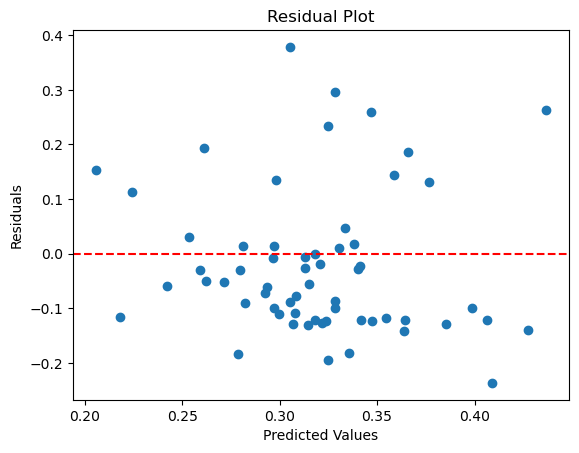

In [123]:
print('~~~~~~~~~~~~~~~~~~~~~~~~ Year', e)
X = df1.drop(['Identifier (RIC)','Company Name', 'Price To Book Value Per Share (Daily Time Series Ratio)'], axis=1)
y = df1['Price To Book Value Per Share (Daily Time Series Ratio)']


    # Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create an SVR model
svr_model = SVR()

    # Train the SVR model
svr_model.fit(X_train, y_train)

    # Make predictions on the test set
y_pred = svr_model.predict(X_test)

    # Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    # Extract the support vectors
support_vectors = svr_model.support_vectors_

    # Extract the indices of the support vectors
support_vector_indices = svr_model.support_


print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
import matplotlib.pyplot as plt

# Assuming you have already fitted the regression model and obtained y_pred and y_actual
# y_pred: Predicted values from the regression model
# y_actual: Actual target values

# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [89]:
copydf1,copydf2=[],[]
for i in dfs1:
    copydf1.append(i.copy())
for i in dfs2:
    copydf2.append(i.copy())


In [90]:

for d in dfs1:

# Assuming you have a DataFrame named 'df'
    duplicated_columns = d.columns[d.columns.duplicated()]

    if len(duplicated_columns) > 0:
        print("Duplicate columns found:")
        print(duplicated_columns)

        # Drop one of the duplicated columns
        d = d.drop(columns=duplicated_columns[0], inplace=True)
        print("Dropped column:", duplicated_columns[0])

        print("Updated DataFrame:")
        print(d) 
    else:
        print("No duplicate columns found.")

No duplicate columns found.
Duplicate columns found:
Index(['Company Market Capitalization (Millions, USD)'], dtype='object')
Dropped column: Company Market Capitalization (Millions, USD)
Updated DataFrame:
None
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.


In [91]:
r=0
uz=[]
for df3 in dfs1:
    n=df3.corr(numeric_only=True)
    strongs=[]
    for j in n:
        for i in n.index:
            if abs(df3[j].corr(df3[i]))>.5 and j!=i and not i.__contains__('Score'):
                strongs.append(j)
    h=set(list(df3.columns))-set(strongs)
    h=list(h)
    for a in h:
        uz.append(a)
    print(len(h),h)
e=0
while e<8:
    for a in uz:
        if ' FY' in a:
            b,c=a.split(' FY')
            uz.remove(a)
            uz.append(b)
    e+=1
uz=list(set(uz))
print(uz)
len(uz)

73 ['State Owned Enterprise SOE Score', 'Director Election Majority Requirement', 'Average Board Tenure', 'Internal Promotion', 'Nomination Committee Independence Score', 'Policy Data Privacy Score', 'Board Specific Skills, Percent', 'Internal Audit Department Reporting Score', 'Audit Committee Mgt Independence Score', 'Board Meeting Attendance Average', 'Flexible Working Hours', 'Board Functions Policy Score', 'Board Individual Re-election', 'CEO Compensation Link to TSR Score', 'Board Attendance Score', 'Policy Fair Competition', 'Nomination Committee Involvement', 'Equal Shareholder Rights Score', 'Shareholder Rights Policy Score', 'UNPRI Signatory Score', 'Improvement Tools Business Ethics Score', 'Shareholders Approval Stock Compensation Plan Score', 'Executive Compensation LT Objectives Score', 'Integrated Strategy in MD&A Score', 'Global Compact Signatory Score', 'Board Background and Skills Score', 'Human Rights Breaches Contractor Score', 'Succession Plan Score', 'Policy Busin

100

In [92]:

uz=list(set(uz))

In [93]:
df3= pd.read_excel("Refinitiv data1 2.xlsx", index_col=0)
df3

,Name,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,...,Policy Community Involvement,Policy Data Privacy,Size,Market Cap,RIC,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
0,Comerica Inc,71.06,100,64,89,31,70,0,99,74,...,True,True,Medium,5.543301e+09,CMA,36.709049,1.205307,8.436090,1.426575,20.535860
1,Bread Financial Holdings Inc,68.26,100,64,59,0,72,57,91,30,...,True,True,Medium,1.510608e+09,BFH,19.782263,1.922267,4.460000,2.176750,18.739967
2,Triumph Financial Inc,66.41,100,24,0,51,62,35,59,74,...,True,True,Medium,1.412298e+09,TFIN.O,23.654594,1.194004,3.960470,1.520630,10.565553
3,KeyCorp,63.55,100,64,88,51,63,40,92,74,...,True,True,Medium,9.203002e+09,KEY,43.455799,1.255976,1.928070,0.937319,13.063813
4,Columbia Banking System Inc,62.54,100,62,44,4,55,71,96,30,...,True,True,Medium,4.644446e+09,COLB.O,26.053766,0.674853,3.198850,0.476580,4.930424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Kearny Financial Corp,12.18,100,0,0,0,6,0,10,30,...,False,True,Small,4.876963e+08,KRNY.O,27.290640,0.613927,0.952260,0.510419,4.410676
327,Home Bancorp Inc,10.41,100,0,0,0,1,0,28,30,...,False,True,Small,2.780522e+08,HBCP.O,15.813140,0.664591,4.158160,1.242302,12.010184
328,National Bankshares Inc,8.68,100,0,0,0,4,0,19,30,...,False,True,Small,1.984825e+08,NKSH.O,19.982479,0.462053,4.329500,1.515323,17.498598
329,Hingham Institution For Savings,8.39,100,0,0,0,7,0,4,30,...,True,True,Small,4.421531e+08,HIFS.O,24.191912,0.892089,17.038601,0.870135,9.014524


In [94]:
corr1=df3.corr(numeric_only=True)
corr1

,ESG Score,ESG Controversies Score,Resource Use Score,Emissions Score,Environmental Innovation Score,Workforce Score,Human Rights Score,Community Score,Product Responsibility Score,Management Score,...,Policy Bribery and Corruption,Policy Business Ethics,Policy Community Involvement,Policy Data Privacy,Market Cap,YTD (%),Beta Value,EPS (GAAP),"ROA Tot Assets, LTM","ROE Comm Eqty, LTM"
ESG Score,1.000000,-0.138295,0.733202,0.706403,0.605188,0.733077,0.571042,0.705082,0.572673,0.626827,...,0.261290,0.192922,0.343618,0.088384,0.406153,0.035826,0.282851,0.074863,-0.027527,0.000786
ESG Controversies Score,-0.138295,1.000000,-0.251399,-0.222611,-0.278297,-0.080660,-0.267169,-0.104113,-0.087148,0.042110,...,-0.073189,-0.047057,0.041838,-0.018767,-0.506594,-0.065761,-0.139401,0.021982,-0.198803,-0.021129
Resource Use Score,0.733202,-0.251399,1.000000,0.848077,0.633638,0.623713,0.724125,0.504348,0.510634,0.166299,...,0.159665,0.090972,0.202367,0.044250,0.525651,0.003365,0.293032,0.153817,0.053993,0.039718
Emissions Score,0.706403,-0.222611,0.848077,1.000000,0.604518,0.630400,0.626413,0.515603,0.513366,0.134301,...,0.166552,0.084199,0.228299,0.054369,0.440467,0.052328,0.313676,0.136506,0.030277,0.043388
Environmental Innovation Score,0.605188,-0.278297,0.633638,0.604518,1.000000,0.502329,0.465478,0.391532,0.410896,0.126128,...,0.102702,0.084860,0.164492,0.033843,0.447966,-0.005551,0.242317,0.071138,-0.075464,-0.027962
Workforce Score,0.733077,-0.080660,0.623713,0.630400,0.502329,1.000000,0.434803,0.498315,0.396237,0.170776,...,0.159379,0.108784,0.356225,0.084009,0.342259,-0.024642,0.229151,0.077619,-0.070091,-0.002164
Human Rights Score,0.571042,-0.267169,0.724125,0.626413,0.465478,0.434803,1.000000,0.317443,0.298919,0.140829,...,0.087757,0.034967,0.114724,0.028342,0.539579,-0.032707,0.200718,0.072823,0.071524,-0.016687
Community Score,0.705082,-0.104113,0.504348,0.515603,0.391532,0.498315,0.317443,1.000000,0.453844,0.223978,...,0.544898,0.434936,0.388622,0.129794,0.215971,0.047742,0.282054,0.100308,0.004188,0.034632
Product Responsibility Score,0.572673,-0.087148,0.510634,0.513366,0.410896,0.396237,0.298919,0.453844,1.000000,0.137567,...,0.131506,0.146787,0.268771,0.198033,0.252695,0.108035,0.254003,0.099679,0.023357,0.034523
Management Score,0.626827,0.042110,0.166299,0.134301,0.126128,0.170776,0.140829,0.223978,0.137567,1.000000,...,0.046746,0.012449,0.127987,0.010224,0.103215,0.011150,0.021389,-0.037968,-0.071586,-0.034087


In [95]:
st=[]
ko=df3.copy()
for j in corr1:
    for i in corr1.index:
        if abs(df3[j].corr(df3[i]))>=.5 and j!=i and not i.__contains__('Score'):
            st.append(j)
st=list(set(st))
ko.drop(st, axis=1, inplace=True)

In [96]:
ry=list(ko.columns)
g=0
while g<8:
    for a in ry:
        if ' (' in a:
            b,c=a.split(' (')
            ry.remove(a)
            ry.append(b)
    ry
    g+=1

In [97]:

for i in uz:
    if i in ry:
        print(i)

Policy Fair Competition
Size
Executive Members Gender Diversity, Percent
Policy Bribery and Corruption
Nomination Committee Independence
Shareholders Score
CEO Chairman Duality
Policy Community Involvement
Anti Takeover Devices Above Two
Management Score
Average Board Tenure
Executive Compensation LT Objectives
Product Responsibility Score
Independent Board Members
Board Gender Diversity, Percent


In [98]:
uz.remove('Size')

In [99]:
j=[]
for i in ry:
    if i in uz and i in list(year7.columns) and i in list(year8.columns) and i in list(year0.columns):
        j.append(i)
j=list(set(j))
j

['Policy Fair Competition',
 'Independent Board Members',
 'Anti Takeover Devices Above Two',
 'Management Score',
 'Shareholders Score',
 'Average Board Tenure',
 'Executive Members Gender Diversity, Percent',
 'Board Gender Diversity, Percent',
 'Product Responsibility Score']

In [100]:
k=[]
for i in year1:
    if i in uz and i in list(year7.columns) and i in list(year8.columns) and i in list(year3.columns):
        k.append(i)
k=list(set(k))
print(len(k))
hj=[]
for i in year0:
    if i in uz and i in list(year7.columns) and i in list(year8.columns) and i in list(year3.columns):
        hj.append(i)
hj=list(set(hj))
print(len(hj))
hi=[]

84
80


In [101]:
j=list(set(j))
j

['Policy Fair Competition',
 'Independent Board Members',
 'Anti Takeover Devices Above Two',
 'Management Score',
 'Shareholders Score',
 'Average Board Tenure',
 'Executive Members Gender Diversity, Percent',
 'Board Gender Diversity, Percent',
 'Product Responsibility Score']

In [102]:

# Create an empty list to store the data frames
datalist = []
j.append('Price To Book Value Per Share (Daily Time Series Ratio)')
j.append('Company Name')
j.append('Identifier (RIC)')

# Create a list of names for the data frames
names = ['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9']

# Loop through the names and create data frames
for name, df in zip(names, dfs2):
    # Filter the data frame to keep only the specified columns
    modified_df = df[j].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    datalist.append(modified_df)


In [103]:
# Create an empty list to store the data frames
datalist1 = []
v=[]
v=j
v.remove('Price To Book Value Per Share (Daily Time Series Ratio)')
v.append('Stock Return')

# Create a list of names for the data frames
names = ['df0_1','df1_1', 'df2_1', 'df3_1', 'df4_1', 'df5_1', 'df6_1', 'df7_1', 'df8_1', 'df9_1']

# Loop through the names and create data frames
for name, df in zip(names, dfs1):
    # Filter the data frame to keep only the specified columns
    modified_df = df[v].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    datalist1.append(modified_df)

In [104]:
# Create an empty list to store the data frames
datalist2 = []
w=[]
w=v
w.append('Volatility')
w.remove('Stock Return')

# Create a list of names for the data frames
names = ['df0_2','df1_2', 'df2_2', 'df3_2', 'df4_2', 'df5_2', 'df6_2', 'df7_2', 'df8_2', 'df9_2']

# Loop through the names and create data frames
for name, df in zip(names, dfs1):
    # Filter the data frame to keep only the specified columns
    modified_df = df[w].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    datalist2.append(modified_df)


In [105]:
# Create an empty list to store the data frames
data_frame_listpb = []

names = ['df1_3', 'df2_3', 'df3_3', 'df4_3', 'df5_3', 'df6_3', 'df7_3', 'df8_3', 'df9_3']
# Loop through the names and create data frames
for name, df in zip(names, dfs2):
    # Filter the data frame to keep only the specified columns
    modified_df = df[k].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    data_frame_listpb.append(modified_df)
data_frame_lists = []

names = ['df0_4','df1_4', 'df2_4', 'df3_4', 'df4_4', 'df5_4', 'df6_4', 'df7_4', 'df8_4', 'df9_4']
# Loop through the names and create data frames
for name, df in zip(names, dfs1):
    # Filter the data frame to keep only the specified columns
    modified_df = df[hj].copy()
    
    # Assign the modified data frame to a variable with the current name
    globals()[name] = modified_df
    
    # Append the modified data frame to the list
    data_frame_lists.append(modified_df)

In [106]:
df0_1.columns

Index(['Policy Fair Competition', 'Independent Board Members',
       'Anti Takeover Devices Above Two', 'Management Score',
       'Shareholders Score', 'Average Board Tenure',
       'Executive Members Gender Diversity, Percent',
       'Board Gender Diversity, Percent', 'Product Responsibility Score',
       'Company Name', 'Identifier (RIC)', 'Stock Return'],
      dtype='object')

In [107]:

def remove_duplicates(data):
    for d in data:
        duplicated_columns = d.columns[d.columns.duplicated()]

        if len(duplicated_columns) > 0:
            print("Duplicate columns found:")
            print(duplicated_columns)

            # Drop one of the duplicated columns
            d = d.drop(columns=duplicated_columns[0], inplace=True)
            print("Dropped column:", duplicated_columns[0])

            print("Updated DataFrame:")
            print(d) 
        else:
            print("No duplicate columns found.")

In [108]:
remove_duplicates(datalist)
remove_duplicates(datalist1)
remove_duplicates(datalist2)
remove_duplicates(data_frame_lists)
remove_duplicates(data_frame_listpb)

No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns found.
No duplicate columns

In [129]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.model_selection import train_test_split

resp = '0'
while resp.isnumeric():
    resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')

if resp == 'a':
    dframe = datalist
    c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
    e = 1
elif resp == 'b':
    dframe = datalist1
    c = 'Stock Return'
    e = 0
else:
    dframe = datalist2
    c = 'Volatility'
    e = 0

for d in dframe:
    print('~~~~~~~~~~~~~~~~~~~Year', e)
    X = d.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    y = d[c]
    X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=42)
    # Create a linear regression model
    alpha = 1.0
    regression_model2 = Ridge(alpha=alpha)

    # Fit the model on the training data
    regression_model2.fit(X_train, y_train)

    # Get the coefficients
    coefficients = regression_model2.coef_

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = regression_model2.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation \n Mean MAE:",mean_mae,"\n Mean R^2:", mean_r2)

    # Create a DataFrame to store coefficients and corresponding features
    coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

    # Print the DataFrame
    print(coef_df)

    e += 1


a. Price/Book 
b. Stock Return 
c. Volatility
c
~~~~~~~~~~~~~~~~~~~Year 0
Cross Validation 
 Mean MAE: 0.056540042619307694 
 Mean R^2: 0.06905844309390427
                                       Feature  Coefficient
0                      Policy Fair Competition     0.037475
1                    Independent Board Members    -0.141032
2              Anti Takeover Devices Above Two    -0.007580
3                             Management Score     0.039947
4                           Shareholders Score    -0.026904
5                         Average Board Tenure    -0.085835
6  Executive Members Gender Diversity, Percent     0.003654
7              Board Gender Diversity, Percent     0.037088
8                 Product Responsibility Score     0.022124
~~~~~~~~~~~~~~~~~~~Year 1
Cross Validation 
 Mean MAE: 0.0459435447169995 
 Mean R^2: 0.019468367007210018
                                       Feature  Coefficient
0                      Policy Fair Competition     0.006498
1                

/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/Users/elifriedmann/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names

In [142]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.model_selection import train_test_split

resp = '0'
while resp.isnumeric():
    resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')

if resp == 'a':
    dframe = datalist
    c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
    e = 1
elif resp == 'b':
    dframe = datalist1
    c = 'Stock Return'
    e = 0
else:
    dframe = datalist2
    c = 'Volatility'
    e = 0

for d in dframe:
    print('~~~~~~~~~~~~~~~~~~~Year', e)
    if 'Stock Return' in d.columns:
        print('Yes!')
    else:
        print("NO!")

a. Price/Book 
b. Stock Return 
c. Volatility
c
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!
~~~~~~~~~~~~~~~~~~~Year 0
NO!


In [134]:
resp = '0'
while resp.isnumeric():
    resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')

if resp == 'a':
    dframe = datalist
    c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
    e = 1
elif resp == 'b':
    dframe = datalist1
    c = 'Stock Return'
    e = 0
else:
    dframe = datalist2
    c = 'Volatility'
    e = 0

for i in dframe:
    print('~~~~~~~~~~~~~~~~~~~~~~~~ Year', e)
    X = i.drop(['Company Name', "Identifier (RIC)", c], axis=1)
    y = i[c]

    # Add a constant term to the features (required for statsmodels)
    X = sm.add_constant(X)
    X.dropna(inplace=True)
    for qe in X:
        X[qe]=X[qe].astype(float)

    model2 = sm.OLS(y, X)
    results2 = model2.fit()
    pvalues = results2.pvalues.drop('const')
  # Get p-values from the updated model

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = results2.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation, \n Mean MAE:", mean_mae, "\n Mean R^2:", mean_r2)
    print(results2.summary())
    e += 1



a. Price/Book 
b. Stock Return 
c. Volatility
c
~~~~~~~~~~~~~~~~~~~~~~~~ Year 0
Cross Validation, 
 Mean MAE: 0.05600178937483312 
 Mean R^2: 0.09538010398033211
                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     3.942
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           9.42e-05
Time:                        21:41:48   Log-Likelihood:                 309.17
No. Observations:                 300   AIC:                            -598.3
Df Residuals:                     290   BIC:                            -561.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                

In [145]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Stock Return   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     11.19
Date:                Sun, 30 Jul 2023   Prob (F-statistic):            0.00211
Time:                        18:26:45   Log-Likelihood:                 18.266
No. Observations:                  34   AIC:                            -32.53
Df Residuals:                      32   BIC:                            -29.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3028      0.077      3.941      0.000       0.146       0.459
Anti Takeover Devices Above Two    -0.4259      0.127     -3.346      0.002      -0.685      -0.167
==============================================================================
Omnibus:                       54.249   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.320
Skew:                           3.418   Prob(JB):                     6.36e-81
Kurtosis:                      17.628   Cond. No.                         6.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score
resp='0'
while resp!='a' and resp!='b' and resp!='c':
    resp=input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
if resp=='a':
    data_frames=data_frame_listpb
    c='Price To Book Value Per Share (Daily Time Series Ratio)'
    w1=1
elif resp=='b':
    data_frames=data_frame_lists
    c='Stock Return'
    w1=0
elif resp=='c':
    data_frames=data_frame_lists
    c='Volatility'
    w1=0

for d in data_frames:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year', w1)
  # Separate the features (X) and the target variable (y)
    X = d.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    if c=='Stock Return':
        X.drop('Volatility', axis=1, inplace=True)
    elif c=='Volatility':
        X.drop('Stock Return', axis=1, inplace=True)
    else:
        X.drop(['Volatility','Stock Return','Return On Assets - Mean','Beta'], axis=1, inplace=True)
    y = d[c]
    for h in X:
        X[h]=X[h].astype('float')
  # Add a constant term to the features (required for statsmodels)
    X = sm.add_constant(X)

  # Create an OLS (Ordinary Least Squares) model
    model = sm.OLS(y, X)

  # Fit the initial model
    results = model.fit()

  # Perform backward elimination
    pvalues = results.pvalues.drop('const')  # Drop the constant term from p-values
    r_square=results.rsquared
    while pvalues.max() > 0.04:
        max_p_value_feature = pvalues.idxmax()
        X.drop(max_p_value_feature, axis=1, inplace=True)
        model = sm.OLS(y, X).fit()  # Update the model with the modified X
        pvalues = model.pvalues.drop('const')  # Get p-values from the updated model
        y = y  # Update y to remove the corresponding values
    
    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = model.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)
    print("Cross Validation, \n Mean MAE:", mean_mae, "\n Mean R^2:", mean_r2)
    print(model.summary())
    w1+=1
    if w1==8:
        break
    # Display the summary with p-values)

a. Price/Book 
b. Stock Return 
c. Volatility
b
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 0
Cross Validation, 
 Mean MAE: 0.08797677059753968 
 Mean R^2: 0.20541374941878104
                            OLS Regression Results                            
Dep. Variable:           Stock Return   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     8.045
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.87e-11
Time:                        00:03:28   Log-Likelihood:                 213.21
No. Observations:                 300   AIC:                            -404.4
Df Residuals:                     289   BIC:                            -363.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
if resp == 'a':
    data_frames = data_frame_listpb
    c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
    w1 = 1
elif resp == 'b':
    data_frames = data_frame_lists
    c = 'Stock Return'
    w1 = 0
elif resp == 'c':
    data_frames = data_frame_lists
    c = 'Volatility'
    w1 = 0

for d in data_frames:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year', w1)
    # Separate the features (X) and the target variable (y)
    X = d.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    if c == 'Stock Return':
        X.drop('Volatility', axis=1, inplace=True)
    elif c == 'Volatility':
        X.drop('Stock Return', axis=1, inplace=True)
    else:
        X.drop(['Volatility', 'Stock Return', 'Return On Assets - Mean', 'Beta'], axis=1, inplace=True)
    y = d[c]
    for h in X:
        X[h] = X[h].astype('float')
    # Add a constant term to the features (required for statsmodels)
    X = sm.add_constant(X)

    # Create an OLS (Ordinary Least Squares) model
    model = sm.OLS(y, X)

    # Fit the initial model
    results = model.fit()

    # Perform backward elimination
    pvalues = results.pvalues.drop('const')  # Drop the constant term from p-values
    r_square = results.rsquared
    while pvalues.max() > 0.045:
        max_p_value_feature = pvalues.idxmax()
        X.drop(max_p_value_feature, axis=1, inplace=True)
        model = sm.OLS(y, X).fit()  # Update the model with the modified X
        pvalues = model.pvalues.drop('const')  # Get p-values from the updated model
        y = y  # Update y to remove the corresponding values

    # Step 1: Prepare the Data (Assuming X and y are your features and target variable)

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Step 5: Make Predictions
        y_pred = model.predict(X_test)
        # Step 6: Calculate Performance Metrics (e.g., mean squared error)
        mae = mean_absolute_error(y_test, y_pred)
        r2=r2_score(y_test, y_pred)
        r2_scores.append(r2)
        mse_scores.append(mae)

    # Step 7: Evaluate Performance
    mean_mae = np.mean(mse_scores)
    mean_r2 = np.mean(r2_scores)

    print(f'Mean MAE: {mean_mae:.4f}')
    print(f'Mean R^2: {mean_r2:.4f}')
    # Print the final summary
    print(model.summary())
    w1 += 1
    if w1==8:
        break
    


a. Price/Book 
b. Stock Return 
c. Volatility
c
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 0
Mean MAE: 0.0481
Mean R^2: 0.3496
                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     20.71
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.02e-30
Time:                        00:04:36   Log-Likelihood:                 379.26
No. Observations:                 300   AIC:                            -734.5
Df Residuals:                     288   BIC:                            -690.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t   

In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error

resp = input('a. Price/Book \nb. Stock Return \nc. Volatility\n')
if resp == 'a':
    data_frames = data_frame_listpb
    c = 'Price To Book Value Per Share (Daily Time Series Ratio)'
    w1 = 1
elif resp == 'b':
    data_frames = data_frame_lists
    c = 'Stock Return'
    w1 = 0
elif resp == 'c':
    data_frames = data_frame_lists
    c = 'Volatility'
    w1 = 0

for d in data_frames:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year', w1)
    # Separate the features (X) and the target variable (y)
    X = d.drop(['Identifier (RIC)', 'Company Name', c], axis=1)
    if c == 'Stock Return':
        X.drop('Volatility', axis=1, inplace=True)
    elif c == 'Volatility':
        X.drop('Stock Return', axis=1, inplace=True)
    else:
        X.drop(['Volatility', 'Stock Return', 'Return On Assets - Mean', 'Beta'], axis=1, inplace=True)
    y = d[c]
    for h in X:
        X[h] = X[h].astype('float')

    # Step 1: Prepare the Data (Assuming X and y are your features and target variable)

    # Step 2: Choose a Cross-Validation Technique (e.g., K-Fold Cross-Validation)
    k_folds = 5
    cv = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Step 5: Perform Cross-Validation
    mse_scores = []
    r2_scores = []

    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Step 3: Initialize the Model
        model = SVR()

        # Step 4: Train the Model
        model.fit(X_train, y_train)

        # Step 5: Backward Elimination
        p_values = f_regression(X_train, y_train)[1]
        max_p_value_index = np.argmax(p_values)
        while p_values[max_p_value_index] > 0.045:
            X_train.drop(X_train.columns[max_p_value_index], axis=1, inplace=True)
            X_test.drop(X_test.columns[max_p_value_index], axis=1, inplace=True)
            model.fit(X_train, y_train)
            p_values = f_regression(X_train, y_train)[1]
            max_p_value_index = np.argmax(p_values)

        # Step 6: Make Predictions
        y_pred = model.predict(X_test)

        # Step 7: Calculate Performance Metrics (e.g., mean squared error)
        mse = mean_absolute_error(y_test, y_pred)
        mr2 = r2_score(y_test, y_pred)
        mse_scores.append(mse)
        r2_scores.append(mr2)

    # Step 8: Evaluate Performance
    mean_mse = np.mean(mse_scores)
    std_mse = np.mean(r2_scores)
    
    #coefficients = model.coef_
    #for feature, coefficient in zip(X.columns, coefficients):
        #print(f'{feature}: {coefficient}')
    print(f'Mean MAE: {mean_mse:.4f}')
    print(f'R^2 Mean: {std_mse:.4f}')

    w1 += 1


a. Price/Book 
b. Stock Return 
c. Volatility
c
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 0
Mean MAE: 0.0684
R^2 Mean: -0.1017
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 1
Mean MAE: 0.0514
R^2 Mean: -0.1470
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 2
Mean MAE: 0.0724
R^2 Mean: 0.0159
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 3
Mean MAE: 0.0669
R^2 Mean: -0.2815
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 4
Mean MAE: 0.0989
R^2 Mean: -0.2415
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 5
Mean MAE: 0.0679
R^2 Mean: -0.1099
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 6
Mean MAE: 0.0735
R^2 Mean: -0.3047
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 7
Mean MAE: 0.0728
R^2 Mean: -2.1082
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 8
Mean MAE: 0.1211
R^2 Mean: -8.6428
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  Year 9
Mean MAE: 0.1053
R^2 Mean: -11.6458


# Highest market cap
df_1

df_2 = df[(df['Company Market Capitalization\n(Millions, USD)\nIn the last 10 FY FY0']<=10000) & 
          (df['Company Market Capitalization\n(Millions, USD)\nIn the last 10 FY FY0']>=1000)]

# Medium market cap
df_2

df_3 = df[df['Company Market Capitalization\n(Millions, USD)\nIn the last 10 FY FY0']<1000]

#Lowest market cap
df_3

Inputting missing values in each column with its mean within specific market cap grouping

df_1 = df_1.fillna(df_1.drop(['Identifier (RIC) nan','Company Name nan'], axis=1).mean())

df_1.isna().any()

df_2 = df_2.fillna(df_2.drop(['Identifier (RIC) nan','Company Name nan'], axis=1).mean())

df_3 = df_3.fillna(df_3.drop(['Identifier (RIC) nan','Company Name nan'], axis=1).mean())

Re-joining the split dataframes by market cap into one dataframe.

combined_df = pd.concat([df_1, df_2, df_3])
combined_df = combined_df.reset_index(drop=True)

combined_df.isna().any()

combined_df.to_excel('test2.xlsx',index=False)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(60,40))
sns.heatmap(combined_df.corr(numeric_only=True));
